In [1]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Initialization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [3]:
path = "/content/drive/MyDrive/SciFi/"

TASK 1

The intensity (counts) should be plotted against the wavelength, in each case for room light switched on and room light switched off. The plot should be repeated, with the dark counts subtracted from the intensity. In the following, the adjusted, ”cleaned” intensity is always denoted as the intensity.

In [4]:
df_dark = pd.read_csv(path + 'Raj_Light_Off.txt', delimiter='\t', header=0)
df_on = pd.read_csv(path + 'Raj_Light_On.txt', delimiter='\t', header=0)
df_dark.columns = [col.lstrip('#') for col in df_dark.columns]
df_on.columns = [col.lstrip('#') for col in df_on.columns]

In [5]:
max_idx = df_on['C1'].idxmax()
peak_wavelength = df_on.loc[max_idx, 'lambda/nm']
peak_value = df_on.loc[max_idx, 'C1']

print(f"Peak at {peak_wavelength} nm with value {peak_value}")

Peak at 593.96 nm with value 47183.2


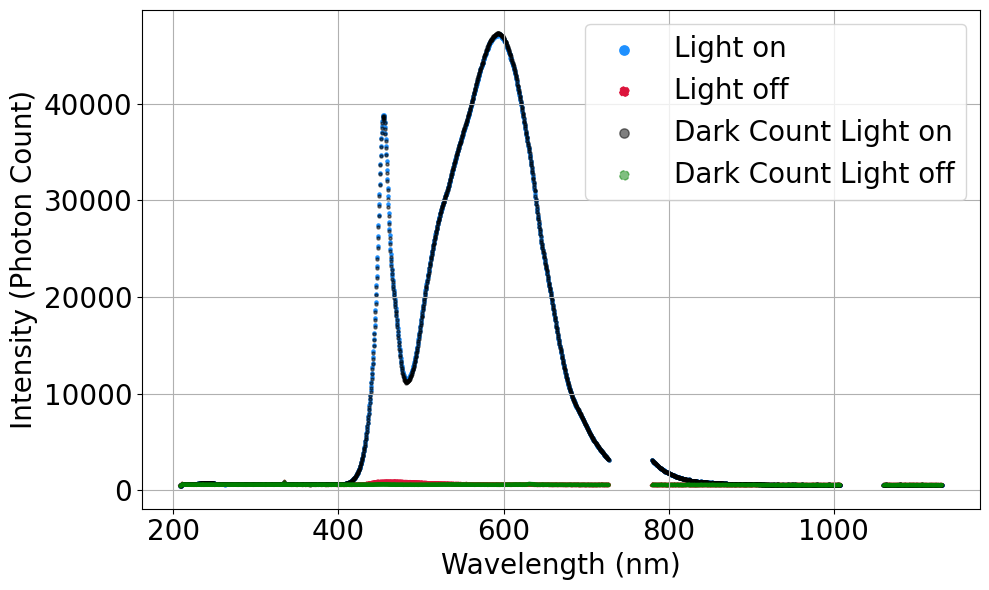

In [6]:
plt.figure(figsize=(10, 6), dpi=100)

# Plotting both datasets with styles
plt.scatter(df_on['lambda/nm'], df_on['C1'], label='Light on', color='dodgerblue', s=5)
plt.scatter(df_dark['lambda/nm'], df_dark['C1'], label='Light off', color='crimson', s=5, linestyle='--')

plt.scatter(df_on['lambda/nm'], df_on['DC'], label='Dark Count Light on', color='black', s=5,alpha=0.5)
plt.scatter(df_dark['lambda/nm'], df_dark['DC'], label='Dark Count Light off', color='green', s=5, alpha=0.5, linestyle='--')

# Titles and labels
#plt.title('Spectral Response Comparison', fontsize=16)
plt.xlabel('Wavelength (nm)', fontsize=20)
plt.ylabel('Intensity (Photon Count)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
# Grid, legend, and styling
plt.grid(True)
plt.legend(fontsize=20, markerscale=3)
plt.tight_layout()

plt.savefig("spectrum_high_res.png", dpi=300)

# Show the plot
plt.show()

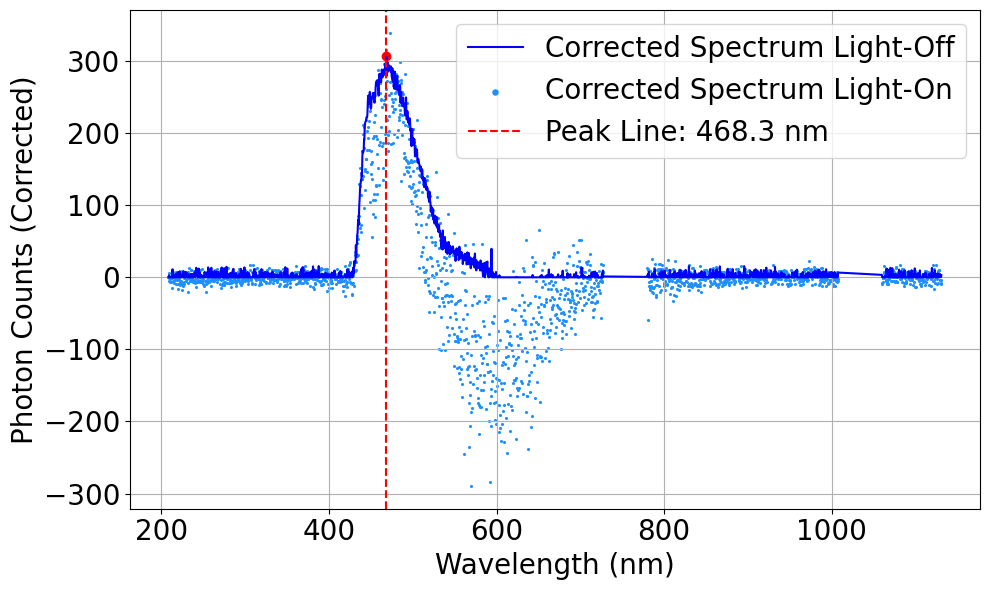

In [7]:
# Calculate corrected photon counts
df_dark["corrected"] = (df_dark["C1"] - df_dark["DC"]).clip(lower=0)

# Find peak wavelength and value
peak_idx = df_dark["corrected"].idxmax()
peak_wavelength = df_dark.loc[peak_idx, "lambda/nm"]
peak_value = df_dark.loc[peak_idx, "corrected"]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_dark["lambda/nm"], df_dark["corrected"], label="Corrected Spectrum Light-Off", color="blue")
plt.scatter(df_on['lambda/nm'], df_on['C1']-df_on['DC'], label='Corrected Spectrum Light-On', color='dodgerblue', s=1.5)

plt.axvline(peak_wavelength, color='red', linestyle='--', label=f'Peak Line: {peak_wavelength:.1f} nm')
plt.scatter([peak_wavelength], [peak_value], color='red')
#plt.title("Corrected Photon Spectrum")
plt.xlabel("Wavelength (nm)", fontsize=20)
plt.ylabel("Photon Counts (Corrected)", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(fontsize=20, markerscale=3)
plt.grid(True)
plt.tight_layout()

plt.savefig("corrected_spectrum_high_res.png", dpi=300)
plt.show()

TASK 2

In this measurement, the radial symmetry of the light intensity is to be verified. To do this, the light intensity is to be recorded for different angles with a fixed excitation position. The horizontal angles should cover a range from −18° to 30° and the vertical angle a range from −6° to 35°. The intensity should be displayed in a two-dimensional histogram.

In [8]:
df_combined = pd.DataFrame(columns=['lambda/nm', 'C1', 'h', 'v', 'x'])
df_combined_dark = pd.DataFrame(columns=['lambda/nm', 'C1', 'h', 'v', 'x'])

In [9]:
for h in range(-18,30, 4): # Horizontal -6 to 26
  for v in range(-6,30 + 4, 4 ): # Vertical -6 to 30 #Still need the last point!!!
    df_new = pd.read_csv(path+ 'Raj_Radial/Attenuation_h=' +str(h)+'deg_v='+str(v)+'deg_x=10mm.txt', delimiter='\t', header=0)
    # df_new = pd.read_csv(path + 'Raj_Radial/DarkCounts_h=' +str(h)+'deg_v='+str(v)+'deg.txt', delimiter='\t', header=0)

    df_new.columns = [col.lstrip('#') for col in df_new.columns]
    df_new['h'] = h
    df_new['v'] = v
    df_new['x'] = 10
    df_combined = pd.concat([df_combined, df_new], ignore_index=True)

/tmp/ipython-input-3203866817.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_combined = pd.concat([df_combined, df_new], ignore_index=True)


In [10]:
# #Outlier Data
# df_new = pd.read_csv(path+ 'Raj_Radial/Attenuation_h=' +str(h)+'deg_v='+str(v)+'deg_x=10mm.txt', delimiter='\t', header=0)
# df_new.columns = [col.lstrip('#') for col in df_new.columns]
# df_new['h'] = h
# df_new['v'] = v
# df_new['x'] = 10
# df_combined = pd.concat([df_combined, df_new], ignore_index=True)

In [11]:
for h in range(-18,30, 4): #Horizontal -6 to 26
  for v in range(-6,30 + 4, 4 ): #Vertical -6 to 30 #Still need the last point!!!
    # df_new = pd.read_csv(path+ 'Raj_Radial/Attenuation_h=' +str(h)+'deg_v='+str(v)+'deg_x=10mm.txt', delimiter='\t', header=0)
    df_new = pd.read_csv(path + 'Raj_Radial/DarkCounts_h=' +str(h)+'deg_v='+str(v)+'deg.txt', delimiter='\t', header=0)

    df_new.columns = [col.lstrip('#') for col in df_new.columns]
    df_new['h'] = h
    df_new['v'] = v
    df_new['x'] = 10
    df_combined_dark = pd.concat([df_combined, df_new], ignore_index=True)

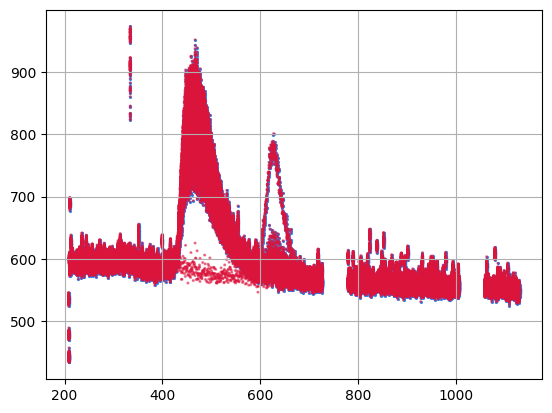

In [12]:
plt.scatter(df_combined['lambda/nm'], df_combined['C1'], label='LED On', color='dodgerblue', s=1.5)
plt.scatter(df_combined_dark['lambda/nm'], df_combined_dark['C1'], label='LED Off', color='crimson', alpha=0.5, s=1.5, linestyle='--')
plt.grid(True)
plt.show()

In [13]:
#Increase Signal-to-noise Ratio??
df_combined = df_combined[ (df_combined['lambda/nm'] > 400) & (df_combined['lambda/nm'] < 600) ]

/tmp/ipython-input-4221007826.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_integrated = df_combined.groupby(['h', 'v']).apply(integrate_counts).reset_index(name='Integrated Intensity')


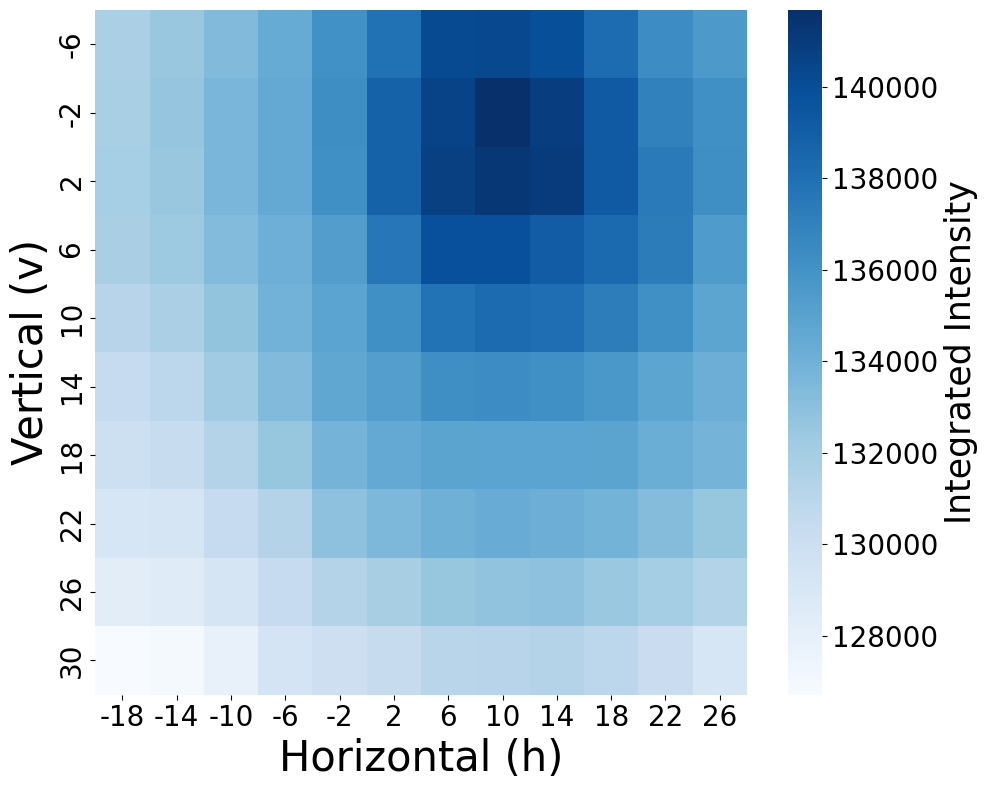

In [14]:
# Group by 'h' and 'v', then integrate counts over 'lambda/nm' for each group
def integrate_counts(group):
  return np.trapezoid(group['C1'], group['lambda/nm'] )

# Apply integration and reset the index
df_integrated = df_combined.groupby(['h', 'v']).apply(integrate_counts).reset_index(name='Integrated Intensity')

heatmap_data = df_integrated.pivot(index='v', columns='h', values='Integrated Intensity')

# Plot the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_data, annot=False, fmt=".2f", cmap='Blues')

# Labels and title
plt.xlabel("Horizontal (h)", fontsize=30)
plt.ylabel("Vertical (v)", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)

# Customize colorbar font size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)  # Tick labels
cbar.set_label("Integrated Intensity", fontsize=25)  # Label

plt.tight_layout()
plt.savefig("heatmap.png", dpi=300)
plt.show()

Investiage more on the dark and signal disparity at the maximum intensity like H-10 and V- -2

TASK 3

- **y_exit, z_exit**: y- and z-coordinates where the photon left the end of the fibre (in millimeters)  
- **x_start, y_start, z_start**: Coordinates where the photon was created (in millimeters)  
- **px_start, py_start, pz_start**: Components of the momentum direction along the individual axes at the creation of the photon. It holds that:  
  \[
  p_x^2 + p_y^2 + p_z^2 = 1
  \]  
- **reflCoCl, reflClCl**: Number of reflections at the core-cladding or cladding-cladding interface  
- **wl**: Wavelength of the photon (in nanometers)  
- **gpsPosX**: x-coordinate where the primary particle for the excitation of the fibre was created (in millimeters)  
- **length_core, length_clad**: Distance travelled in the core or cladding (in millimeters)  
- **rayleighScatterings**: Number of Rayleigh scatterings the photon experienced


In [15]:
df_sim = pd.read_pickle('/content/drive/MyDrive/SciFi/SimData.pkl')
df_sim.head()

,# y_exit,z_exit,x_start,y_start,z_start,px_start,py_start,pz_start,reflCoCl,reflClCl,wl,gpsPosX,length_core,length_clad,rayleighScatterings
0,-0.026978,-0.061619,2400.019897,-0.051878,0.096635,0.948434,0.162628,-0.272077,3649.0,0.0,472.743103,2400.0,2530.557861,0.000000,0.0
1,-0.055254,0.050902,2400.000732,0.085666,0.015889,0.977825,-0.139056,-0.156593,2674.0,0.0,504.521210,2400.0,2454.456055,0.000000,0.0
2,0.049212,0.065583,2399.990967,0.006511,-0.025208,0.917937,-0.225034,0.326729,0.0,3894.0,442.621185,2400.0,2204.132568,381.522583,0.0
3,-0.018177,-0.106197,2400.062012,-0.043234,-0.098842,0.885576,0.074564,-0.458470,0.0,5517.0,484.213989,2400.0,2210.260498,466.030212,0.0
4,0.050591,0.043467,2400.000977,-0.004035,-0.069628,0.971248,-0.103995,-0.214154,2757.0,0.0,489.916565,2400.0,2470.986084,0.000000,0.0


In [16]:
np.shape(df_sim)

(11795248, 15)

First of all, unphysical simulation errors must be corrected. To do this, the distance between the exit point and the center of the fiber must be determined. What value must this not exceed? Then all photons that have caused Rayleigh scattering should be removed. The simulated data set should be divided into core and cladding photons.

In [17]:
df_core = df_sim[ (df_sim['reflCoCl'] >= 0) & (df_sim['reflClCl'] == 0)] # Total Internal Reflection
df_clad = df_sim[ (df_sim['reflCoCl'] == 0) & (df_sim['reflClCl'] >= 0)] #

In [18]:
ex_photon = np.shape(df_sim)[0] - np.shape(df_core)[0] + np.shape(df_clad)[0] # Rayleigh scattering???

print(f'Excluded Photon: {ex_photon}, Ratio: {(ex_photon/np.shape(df_sim)[0]):.2f} ')

Excluded Photon: 7379236, Ratio: 0.63 


In [19]:
df_core.columns

Index(['# y_exit', 'z_exit', 'x_start', 'y_start', 'z_start', 'px_start',
       'py_start', 'pz_start', 'reflCoCl', 'reflClCl', 'wl', 'gpsPosX',
       'length_core', 'length_clad', 'rayleighScatterings'],
      dtype='object')

In [20]:
distance_core = np.sqrt( df_core['# y_exit']**2 + df_core['z_exit']**2)
distance_clad = np.sqrt( df_clad['# y_exit']**2 + df_clad['z_exit']**2)

In [21]:
# all_data = np.concatenate([distance_core, distance_clad])
# min_dist, max_dist = np.min(all_data), np.max(all_data)
# bins = np.linspace(min_dist, max_dist, 5)
# fig, axes = plt.subplots(2, 2, figsize=(10, 8))
# axes = axes.flatten()

# for i in range(4):
#     core_segment = distance_core[(distance_core >= bins[i]) & (distance_core < bins[i+1])]
#     clad_segment = distance_clad[(distance_clad >= bins[i]) & (distance_clad < bins[i+1])]

#     # Plot histograms
#     axes[i].hist(core_segment, bins=100, alpha=0.5, label='Core')
#     axes[i].hist(clad_segment, bins=100, alpha=0.5, label='Cladding')
#     axes[i].set_title(f"Range: {bins[i]:.2f} - {bins[i+1]:.2f}")
#     axes[i].legend()

# plt.tight_layout()
# plt.show()


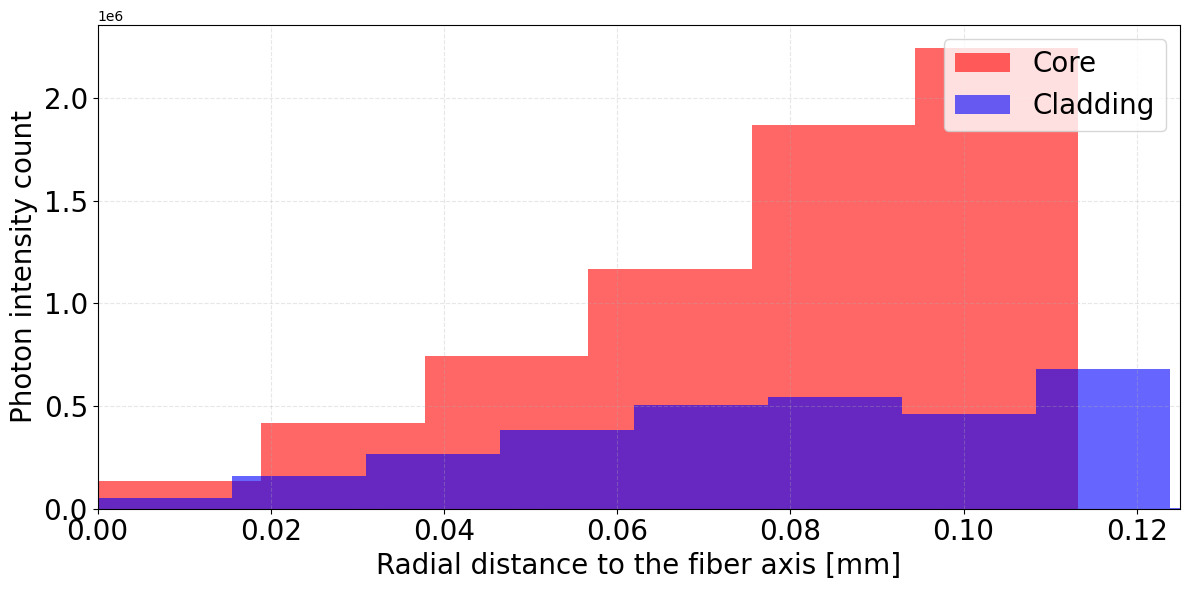

In [22]:
#The thickness of fibre is 250 micro => Max Radius must be 125 micro
plt.figure(figsize=(12, 6))

plt.hist(distance_core, bins=200, alpha=0.6, label="Core", color="red", histtype='stepfilled')
plt.hist(distance_clad, bins=200, alpha=0.6, label="Cladding", color="blue", histtype='stepfilled')

#plt.title("Photon Intensity vs. Radial Distance to Fiber Axis")
plt.xlabel("Radial distance to the fiber axis [mm]", fontsize=20)
plt.ylabel("Photon intensity count", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlim(0, 0.125)
plt.legend(fontsize=20, markerscale=3, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.savefig("photon_distance_histogram.png", dpi=300)

plt.show()

In [23]:
cor_core = df_core[distance_core <= 0.125]
cor_clad = df_clad[distance_clad <= 0.125]

The angle 𝜃 of the photon to the x-axis (fiber) is not a parameter of the simulated photons. How can this be determined from the direction of momentum? The momentum is standardized.

In [24]:
cor_core.columns

Index(['# y_exit', 'z_exit', 'x_start', 'y_start', 'z_start', 'px_start',
       'py_start', 'pz_start', 'reflCoCl', 'reflClCl', 'wl', 'gpsPosX',
       'length_core', 'length_clad', 'rayleighScatterings'],
      dtype='object')

In [25]:
theta_core = np.arccos(cor_core['px_start'])
theta_clad = np.arccos(cor_clad['px_start'])


# theta_core = np.arcsin(cor_core['px_start'])
# theta_clad = np.arcsin(cor_clad['px_start'])


deg_core = np.degrees(theta_core)
deg_clad = np.degrees(theta_clad)

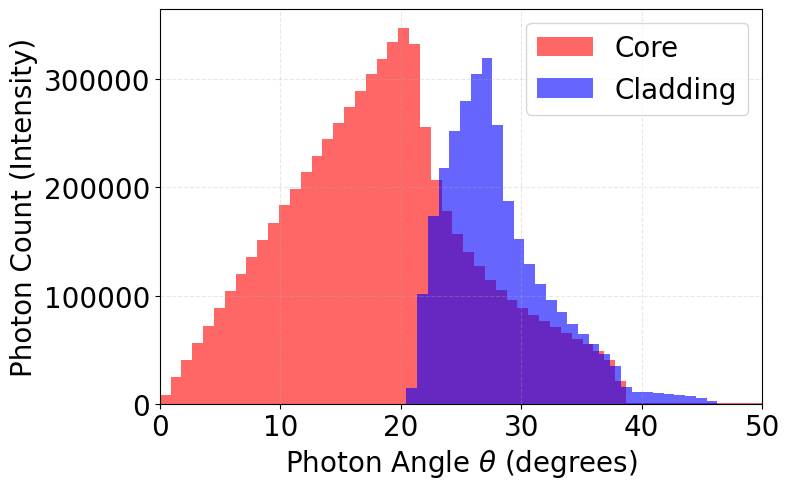

In [26]:
plt.figure(figsize=(8, 5))
#Plot Histogram
plt.hist(deg_core, bins=200, alpha=0.6, label="Core", color="red", histtype='stepfilled')
plt.hist(deg_clad, bins=200, alpha=0.6, label="Cladding", color="blue", histtype='stepfilled')

#plt.title("Photon Intensity vs. Photon Angle $\\theta$ Relative to the Fiber Axis", fontsize=13)
plt.xlabel("Photon Angle $\\theta$ (degrees)", fontsize=20)
plt.ylabel("Photon Count (Intensity)", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlim(0, 50)
plt.legend(fontsize=20, markerscale=3, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.savefig("photon_angle.png", dpi=300)
plt.show()

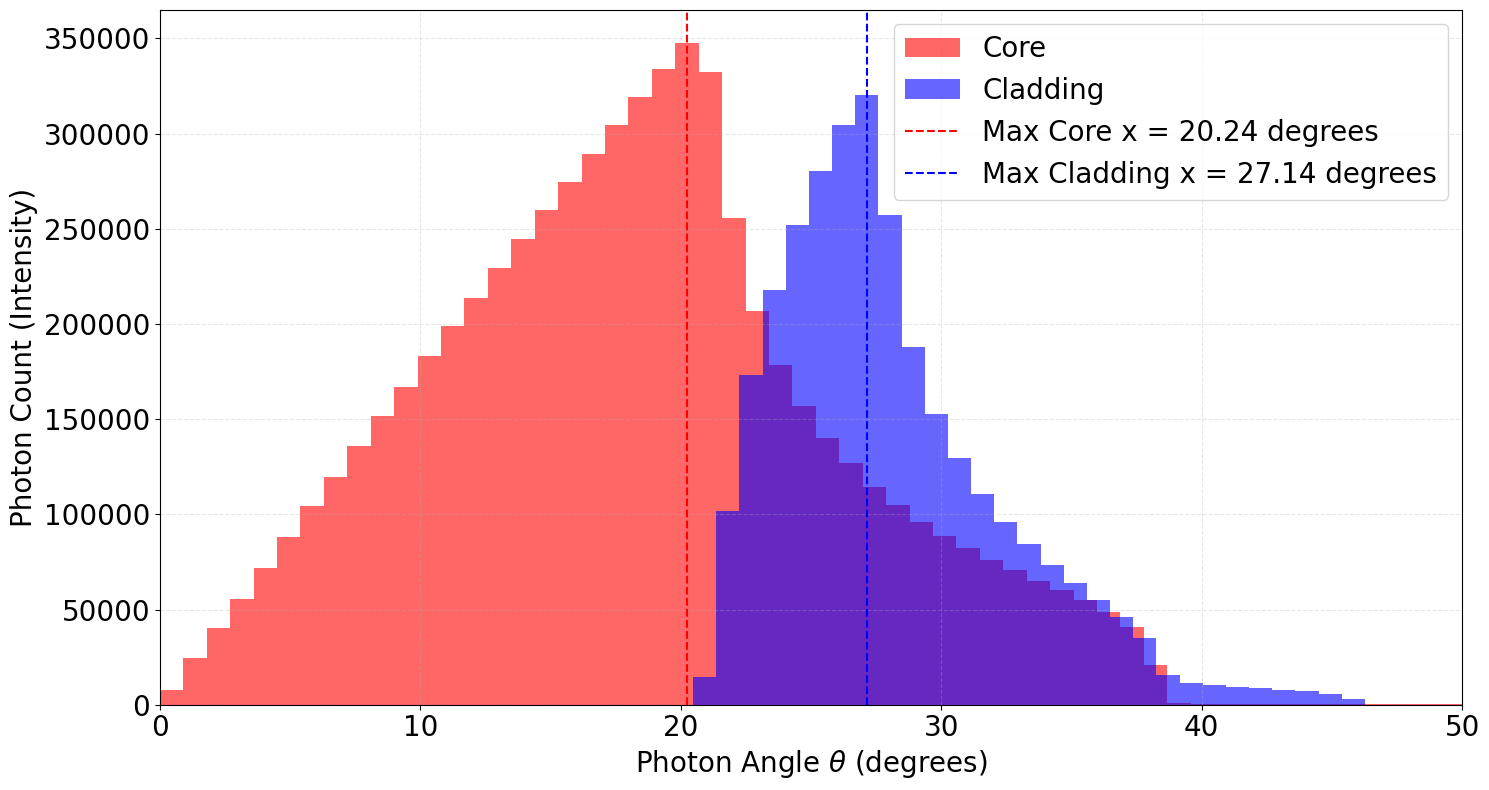

Max Core x-value: 20.24 degrees
Max Cladding x-value: 27.14 degrees


In [27]:
# Plot the histograms
plt.figure(figsize=(15, 8))

# Core Histogram
count_core, bins_core, _ = plt.hist(deg_core, bins=200, alpha=0.6, label="Core", color="red", histtype='stepfilled')

# Cladding Histogram
count_clad, bins_clad, _ = plt.hist(deg_clad, bins=200, alpha=0.6, label="Cladding", color="blue", histtype='stepfilled')

# Find the x-value of the max bin in deg_core
max_core_bin_idx = np.argmax(count_core)
max_core_x = (bins_core[max_core_bin_idx] + bins_core[max_core_bin_idx + 1]) / 2

# Find the x-value of the max bin in deg_clad
max_clad_bin_idx = np.argmax(count_clad)
max_clad_x = (bins_clad[max_clad_bin_idx] + bins_clad[max_clad_bin_idx + 1]) / 2

# Plot vertical lines at the max values for Core and Cladding
plt.axvline(max_core_x, color='red', linestyle='--', label=f'Max Core x = {max_core_x:.2f} degrees')
plt.axvline(max_clad_x, color='blue', linestyle='--', label=f'Max Cladding x = {max_clad_x:.2f} degrees')

# Title and labels
#plt.title("Photon Intensity vs. Photon Angle $\\theta$ Relative to the Fiber Axis", fontsize=13)
plt.xlabel("Photon Angle $\\theta$ (degrees)", fontsize=20)
plt.ylabel("Photon Count (Intensity)", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

# Adjust the x-axis limits, legend, and grid
plt.xlim(0, 50)
plt.legend(fontsize=20, markerscale=3, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.3)

# Make the plot layout tight and save it
plt.tight_layout()
plt.savefig("photon_angle.png", dpi=300)

# Show the plot
plt.show()

# Print the x-values of the maximum photon intensities
print(f"Max Core x-value: {max_core_x:.2f} degrees")
print(f"Max Cladding x-value: {max_clad_x:.2f} degrees")

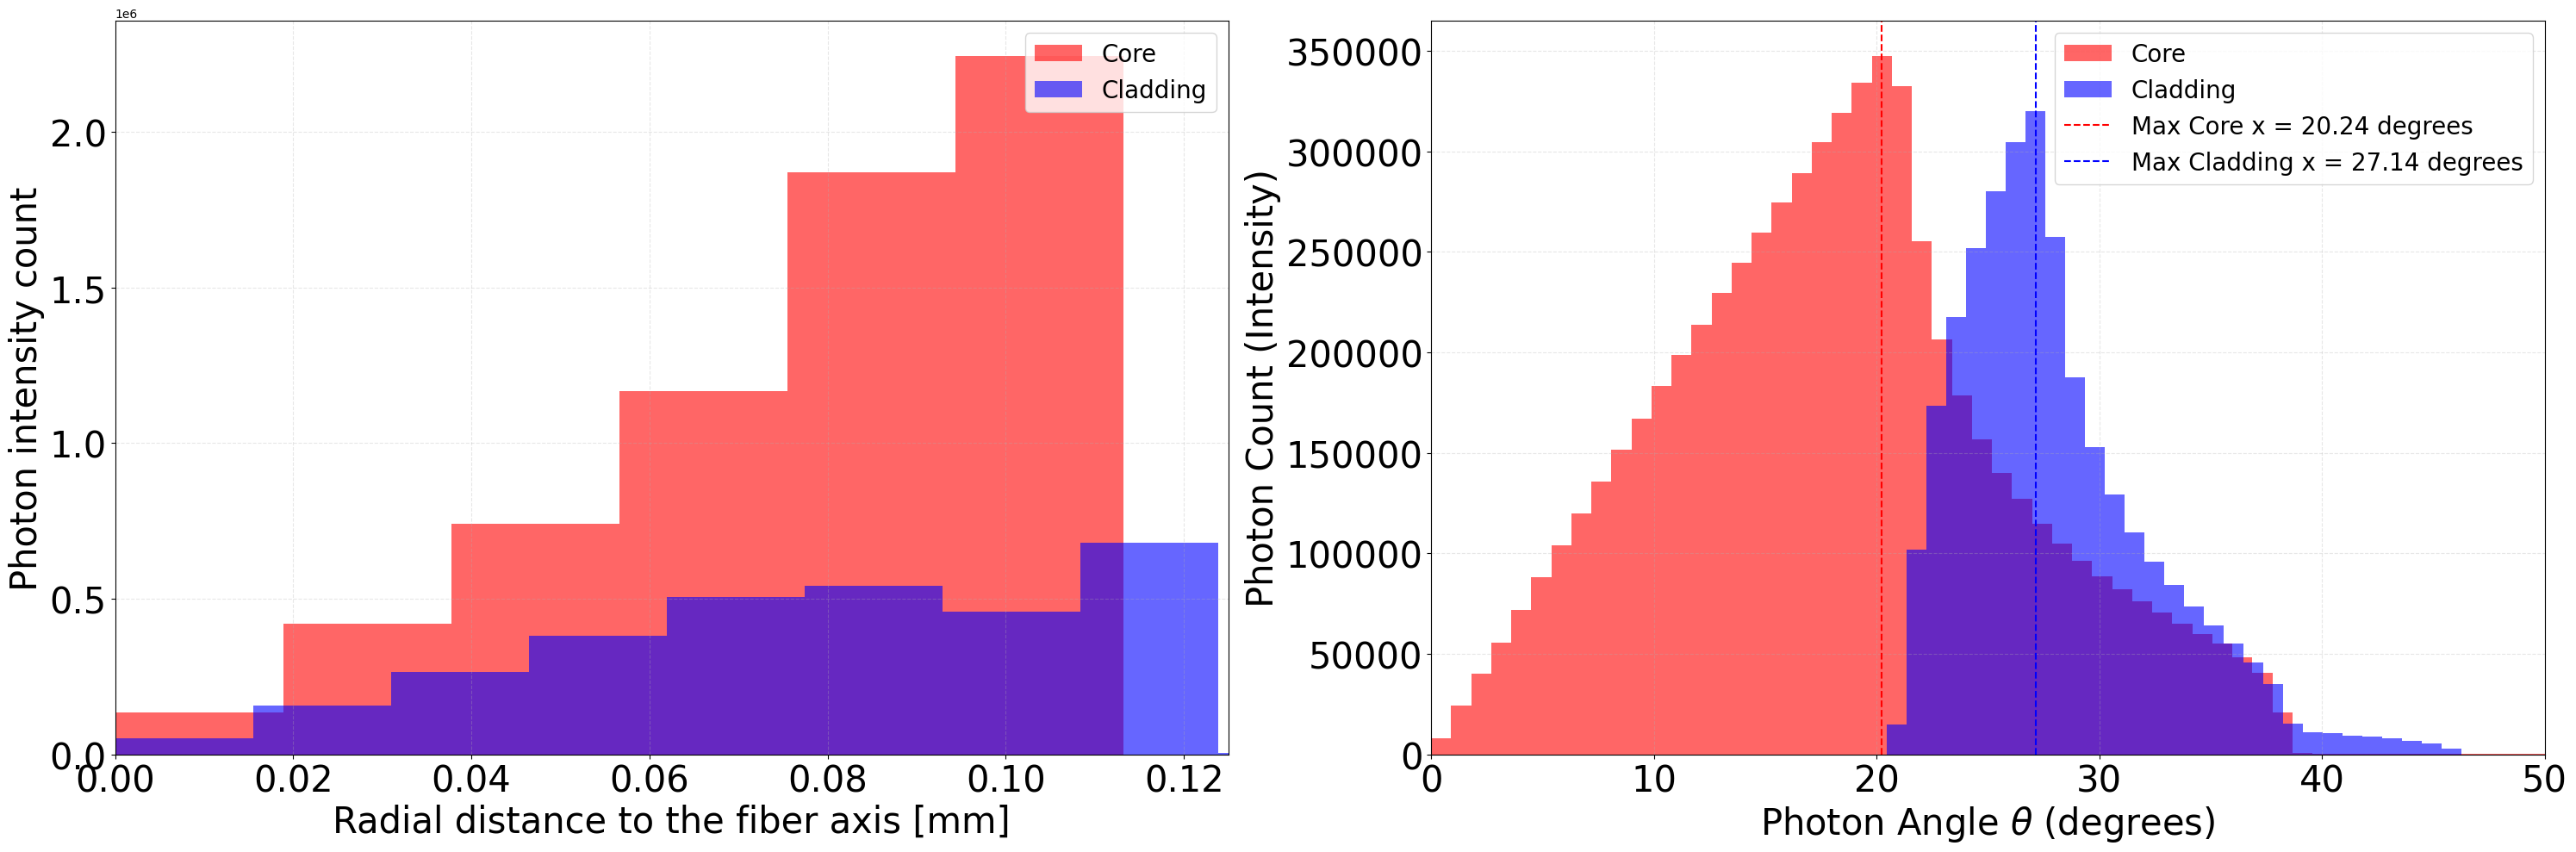

Max Core x-value: 20.24 degrees
Max Cladding x-value: 27.14 degrees


In [28]:
plt.figure(figsize=(30, 10))

# First subplot: Photon Intensity vs. Radial Distance to Fiber Axis
plt.subplot(1, 2, 1)  # 1 row, 2 columns, this is the first plot
plt.hist(distance_core, bins=200, alpha=0.6, label="Core", color="red", histtype='stepfilled')
plt.hist(distance_clad, bins=200, alpha=0.6, label="Cladding", color="blue", histtype='stepfilled')
#plt.title("Photon Intensity vs. Radial Distance to Fiber Axis")
plt.xlabel("Radial distance to the fiber axis [mm]", fontsize=30)
plt.ylabel("Photon intensity count", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.xlim(0, 0.125)
plt.legend(fontsize=20, markerscale=3, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.3)

# Second subplot: Photon Intensity vs. Photon Angle Relative to the Fiber Axis
plt.subplot(1, 2, 2)  # 1 row, 2 columns, this is the second plot
# Core Histogram
count_core, bins_core, _ = plt.hist(deg_core, bins=200, alpha=0.6, label="Core", color="red", histtype='stepfilled')

# Cladding Histogram
count_clad, bins_clad, _ = plt.hist(deg_clad, bins=200, alpha=0.6, label="Cladding", color="blue", histtype='stepfilled')

# Find the x-value of the max bin in deg_core
max_core_bin_idx = np.argmax(count_core)
max_core_x = (bins_core[max_core_bin_idx] + bins_core[max_core_bin_idx + 1]) / 2

# Find the x-value of the max bin in deg_clad
max_clad_bin_idx = np.argmax(count_clad)
max_clad_x = (bins_clad[max_clad_bin_idx] + bins_clad[max_clad_bin_idx + 1]) / 2

# Plot vertical lines at the max values for Core and Cladding
plt.axvline(max_core_x, color='red', linestyle='--', label=f'Max Core x = {max_core_x:.2f} degrees')
plt.axvline(max_clad_x, color='blue', linestyle='--', label=f'Max Cladding x = {max_clad_x:.2f} degrees')

# Title and labels
#plt.title("Photon Intensity vs. Photon Angle $\\theta$ Relative to the Fiber Axis", fontsize=13)
plt.xlabel("Photon Angle $\\theta$ (degrees)", fontsize=30)
plt.ylabel("Photon Count (Intensity)", fontsize=30)

plt.tick_params(axis='both', which='major', labelsize=30)

# Adjust the x-axis limits, legend, and grid
plt.xlim(0, 50)
plt.legend(fontsize=20, markerscale=3, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.3)

# Adjust layout and save the figure
plt.tight_layout()

# Save the figure
plt.savefig("photon_combined.png", dpi=300)

# Show the plot
plt.show()

# Print the x-values of the maximum photon intensities
print(f"Max Core x-value: {max_core_x:.2f} degrees")
print(f"Max Cladding x-value: {max_clad_x:.2f} degrees")

In [29]:
deg_core.mean(), np.sqrt(deg_core.var())

(np.float64(19.770992803248422), np.float64(15.286456538383922))

The maximum angle at which total internal reflection can still occur is to be determined for the core and cladding photons (Mathematically, not using a script, but using your own calculations).

The minimum distance of the photons to the fiber center should be determined (distance of two lines). Now a two-dimensional histogram of 𝜃 and the minimum distance is to be created, in each case for core and cladding photons. How does the distribution come about? Why are no photons detected above a certain angle?

In [30]:
cor_core.columns

Index(['# y_exit', 'z_exit', 'x_start', 'y_start', 'z_start', 'px_start',
       'py_start', 'pz_start', 'reflCoCl', 'reflClCl', 'wl', 'gpsPosX',
       'length_core', 'length_clad', 'rayleighScatterings'],
      dtype='object')

In [31]:
#Not sure about the formular _*_
cross_core = np.abs(cor_core['y_start']* cor_core['pz_start'] - cor_core['z_start']* cor_core['py_start'])
norm_core = np.sqrt(cor_core['pz_start']**2 + cor_core['py_start']**2)
r_core = cross_core/norm_core

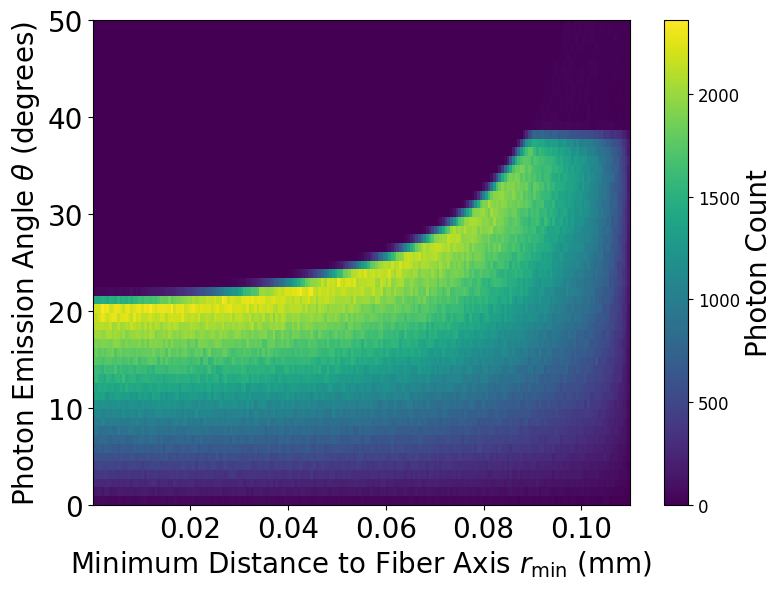

In [32]:
plt.figure(figsize=(8, 6))
plt.hist2d(r_core, deg_core, bins=[200, 200], cmap='viridis')

plt.xlabel("Minimum Distance to Fiber Axis $r_{\\text{min}}$ (mm)", fontsize=20)
plt.ylabel("Photon Emission Angle $\\theta$ (degrees)", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim(0, 50)
#plt.title("2D Histogram of $r_{\\text{min}}$ vs. Emission Angle $\\theta$ for Core Photons", fontsize=13)
cbar = plt.colorbar(label='Photon Count')
cbar.ax.tick_params(labelsize=12)  # Set tick label font size
cbar.set_label('Photon Count', fontsize=20)  # Set label font size
# plt.legend(fontsize=20, markerscale=3)
plt.tight_layout()

plt.savefig("rmin_vs_theta_histogram.png", dpi=300)
plt.show()

In [33]:
cross_clad = np.abs(cor_clad['y_start']* cor_clad['pz_start'] - cor_clad['z_start']* cor_clad['py_start'])
norm_clad = np.sqrt(cor_clad['pz_start']**2 + cor_clad['py_start']**2)
r_clad = cross_clad/norm_clad

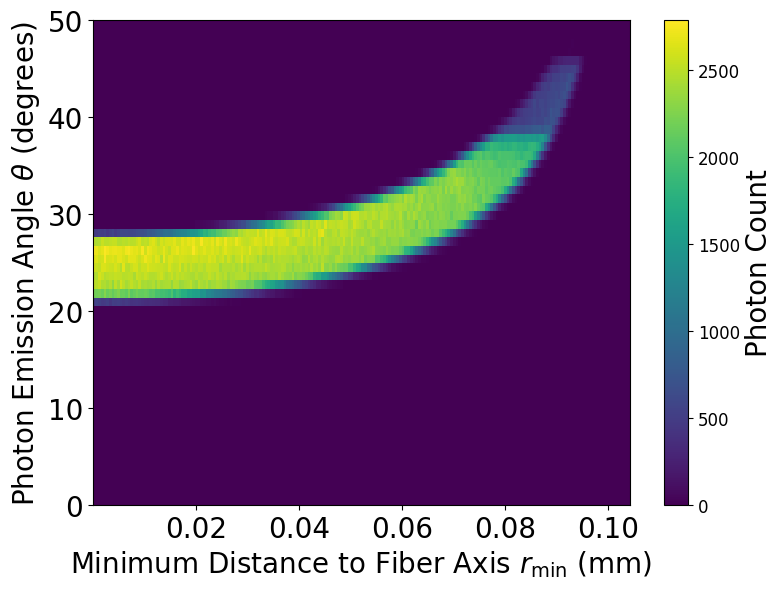

In [34]:
plt.figure(figsize=(8, 6))
plt.hist2d(r_clad, deg_clad, bins=[200, 200], cmap='viridis')

plt.xlabel("Minimum Distance to Fiber Axis $r_{\\text{min}}$ (mm)", fontsize=20)
plt.ylabel("Photon Emission Angle $\\theta$ (degrees)", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim(0, 50)
#plt.title("2D Histogram of $r_{\\text{min}}$ vs. Emission Angle $\\theta$ for Cladding Photons", fontsize=13)
cbar = plt.colorbar(label='Photon Count')
cbar.ax.tick_params(labelsize=12)  # Set tick label font size
cbar.set_label('Photon Count', fontsize=20)  # Set label font size
plt.tight_layout()

plt.savefig("rmin_vs_theta_histogram_cladding.png", dpi=300)
plt.show()

The intensity is to be determined for different angles in relation to the excitation location. Use a fit to determine the attenuation length.

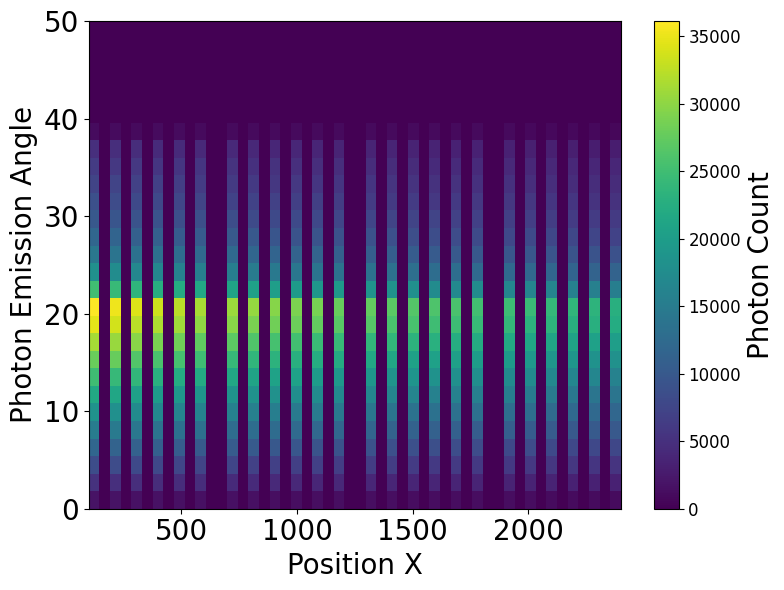

In [35]:
plt.figure(figsize=(8, 6))
plt.hist2d(cor_core['gpsPosX'], deg_core, bins=[50, 100], cmap='viridis')

plt.xlabel("Position X", fontsize=20)
plt.ylabel("Photon Emission Angle", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim(0, 50)
#plt.title("Excitation Position X vs Core Photon Angle $\\theta$ [degrees]", fontsize=14)
cbar = plt.colorbar(label='Photon Count')
cbar.ax.tick_params(labelsize=12)  # Set tick label font size
cbar.set_label('Photon Count', fontsize=20)  # Set label font size
plt.tight_layout()

plt.savefig("exciting-core.png", dpi=300)
plt.show()

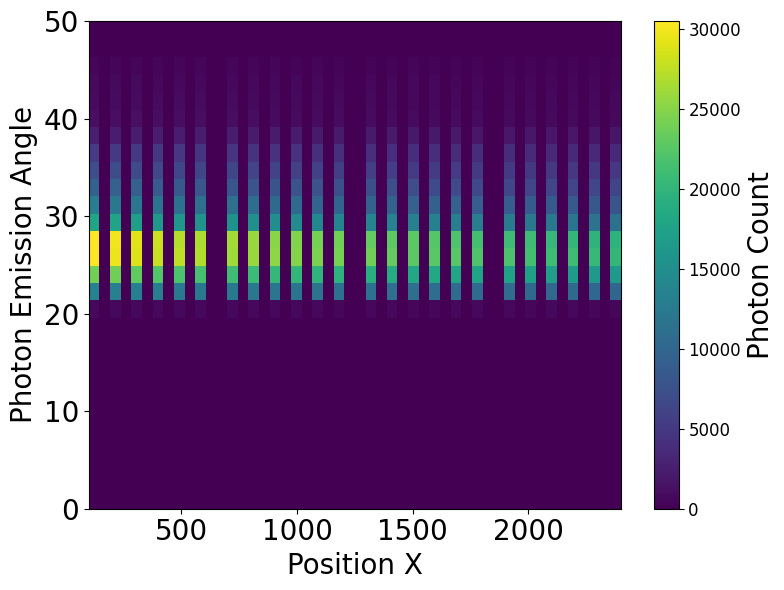

In [36]:
plt.figure(figsize=(8, 6))
plt.hist2d(cor_clad['gpsPosX'], deg_clad, bins=[50, 100], cmap='viridis')

plt.xlabel("Position X", fontsize=20)
plt.ylabel("Photon Emission Angle", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim(0, 50)
#plt.title("Excitation Position X vs Cladding Photon Angle $\\theta$ [degrees]", fontsize=14)
cbar = plt.colorbar(label='Photon Count')
cbar.ax.tick_params(labelsize=12)  # Set tick label font size
cbar.set_label('Photon Count', fontsize=20)  # Set label font size
plt.tight_layout()

plt.savefig("exciting-clad.png", dpi=300)
plt.show()

In [37]:
cor_core.head()

,# y_exit,z_exit,x_start,y_start,z_start,px_start,py_start,pz_start,reflCoCl,reflClCl,wl,gpsPosX,length_core,length_clad,rayleighScatterings
0,-0.026978,-0.061619,2400.019897,-0.051878,0.096635,0.948434,0.162628,-0.272077,3649.0,0.0,472.743103,2400.0,2530.557861,0.0,0.0
1,-0.055254,0.050902,2400.000732,0.085666,0.015889,0.977825,-0.139056,-0.156593,2674.0,0.0,504.521210,2400.0,2454.456055,0.0,0.0
4,0.050591,0.043467,2400.000977,-0.004035,-0.069628,0.971248,-0.103995,-0.214154,2757.0,0.0,489.916565,2400.0,2470.986084,0.0,0.0
5,0.016537,0.030342,2487.261475,0.037348,0.037756,0.947609,0.023118,0.318594,4014.0,0.0,527.115417,2400.0,2624.865234,0.0,0.0
6,0.074679,-0.021847,2400.000244,0.095372,0.006802,0.933133,-0.234433,-0.272586,5341.0,0.0,483.546570,2400.0,2571.967773,0.0,0.0


In [38]:
#attenuation length depends on theta?
# new_core = cor_core.copy()
# new_clad = cor_clad.copy()
cor_core['deg'] = deg_core
cor_clad['deg'] = deg_clad

/tmp/ipython-input-2695644070.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cor_core['deg'] = deg_core
/tmp/ipython-input-2695644070.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cor_clad['deg'] = deg_clad


In [39]:
cor_core.head()

,# y_exit,z_exit,x_start,y_start,z_start,px_start,py_start,pz_start,reflCoCl,reflClCl,wl,gpsPosX,length_core,length_clad,rayleighScatterings,deg
0,-0.026978,-0.061619,2400.019897,-0.051878,0.096635,0.948434,0.162628,-0.272077,3649.0,0.0,472.743103,2400.0,2530.557861,0.0,0.0,18.480141
1,-0.055254,0.050902,2400.000732,0.085666,0.015889,0.977825,-0.139056,-0.156593,2674.0,0.0,504.521210,2400.0,2454.456055,0.0,0.0,12.088536
4,0.050591,0.043467,2400.000977,-0.004035,-0.069628,0.971248,-0.103995,-0.214154,2757.0,0.0,489.916565,2400.0,2470.986084,0.0,0.0,13.772578
5,0.016537,0.030342,2487.261475,0.037348,0.037756,0.947609,0.023118,0.318594,4014.0,0.0,527.115417,2400.0,2624.865234,0.0,0.0,18.628580
6,0.074679,-0.021847,2400.000244,0.095372,0.006802,0.933133,-0.234433,-0.272586,5341.0,0.0,483.546570,2400.0,2571.967773,0.0,0.0,21.071352


In [40]:
# counts_clad, bin_edges_clad = np.histogram(cor_core['gpsPosX'], bins=100)
# non_zero_mask = counts_clad != 0
# filtered_counts = counts_clad[non_zero_mask]
# filtered_bin_edges = bin_edges_clad[:-1][non_zero_mask]

# plt.hist(cor_core['gpsPosX'], bins=100)
# plt.show()

In [41]:
# from scipy.optimize import curve_fit

# counts_clad, bin_edges_clad = np.histogram(cor_core['gpsPosX'], bins=100)
# non_zero_mask = counts_clad != 0
# filtered_counts = counts_clad[non_zero_mask]
# filtered_bin_edges = bin_edges_clad[:-1][non_zero_mask]

# normalized_counts = filtered_counts / filtered_counts[0]
# x, y = filtered_bin_edges, normalized_counts

# def exp_decay(x, lamb):
#     return np.exp(-lamb * x)

# popt, _ = curve_fit(exp_decay, x, y, p0=(0.001,))
# lambda_fit = popt[0]

# y_fit = exp_decay(x, lambda_fit)

# # Plot
# plt.figure(figsize=(8, 5))
# plt.scatter(x, y, label='Data', color='blue')
# plt.plot(x, y_fit, 'r--', label=f'Fit: $e^{{-\\lambda x}},\\ \\lambda={lambda_fit:.6f}$')
# plt.xlabel("x")
# plt.ylabel("Normalized y")
# #plt.title("Exponential Fit")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# print(f"Fitted λ = {lambda_fit:.6f}")
# print(f"Fitted attenuation length = {1/lambda_fit:.6f}")

In [47]:
# tmp_clad = cor_clad[ (cor_clad['deg'] >90) & (cor_clad['deg'] < 100) ]
tmp_clad = cor_core[ (cor_core['deg'] > 0) & (cor_core['deg'] < 10) ]
tmp_core = cor_core[ (cor_core['deg'] > 50) & (cor_core['deg'] < 100) ]

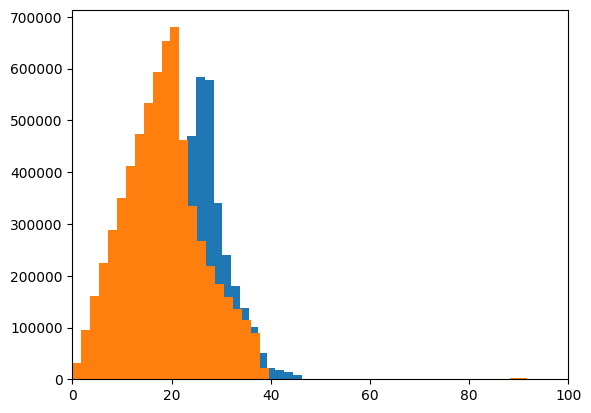

In [43]:
plt.hist(cor_clad['deg'], bins=100)
plt.hist(cor_core['deg'], bins=100)
plt.xlim(0, 100)
plt.show()

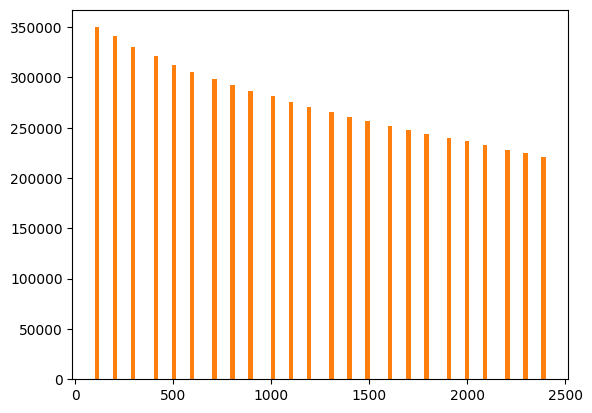

In [44]:
plt.hist(cor_clad['gpsPosX'], bins=100)
plt.hist(cor_core['gpsPosX'], bins=100)
# plt.xlim(0, 100)
plt.show()

In [45]:
# counts_clad, bin_edges_clad = np.histogram(tmp_clad['gpsPosX'], bins=100)
# non_zero_mask = counts_clad != 0
# filtered_counts = counts_clad[non_zero_mask]
# filtered_bin_edges = bin_edges_clad[:-1][non_zero_mask]

# plt.hist(tmp_clad['gpsPosX'], bins=100)
# plt.show()

In [48]:
counts_clad, bin_edges_clad = np.histogram(tmp_clad['gpsPosX'], bins=100)
non_zero_mask = counts_clad != 0
filtered_counts = counts_clad[non_zero_mask]
filtered_bin_edges = bin_edges_clad[:-1][non_zero_mask]

normalized_counts = filtered_counts / filtered_counts[0]
x, y = filtered_bin_edges, normalized_counts

def exp_decay(x, lamb):
    return np.exp(-lamb * x)

popt, _ = curve_fit(exp_decay, x, y, p0=(0.001,))
lambda_fit = popt[0]

y_fit = exp_decay(x, lambda_fit)

In [49]:
def exp_decay(x, lamb):
    return np.exp(-lamb * x)

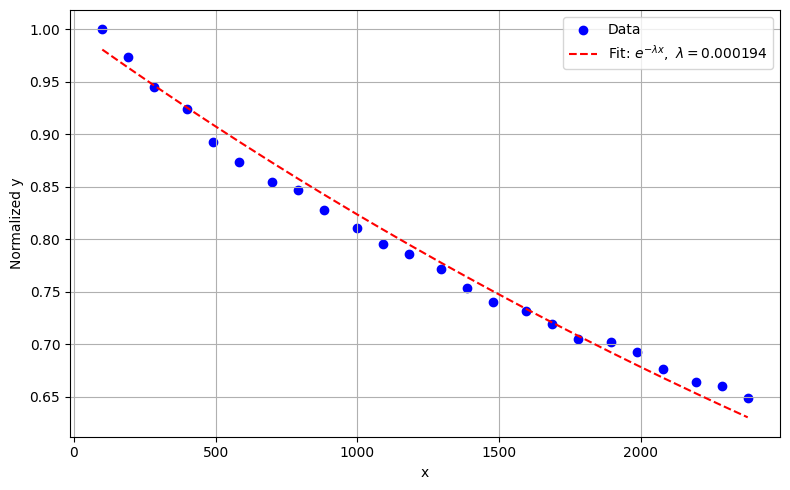

Fitted λ = 0.000194
Fitted attenuation length = 5151.936551


In [50]:
# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, y_fit, 'r--', label=f'Fit: $e^{{-\\lambda x}},\\ \\lambda={lambda_fit:.6f}$')
plt.xlabel("x")
plt.ylabel("Normalized y")
#plt.title("Exponential Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Fitted λ = {lambda_fit:.6f}")
print(f"Fitted attenuation length = {1/lambda_fit:.6f}")

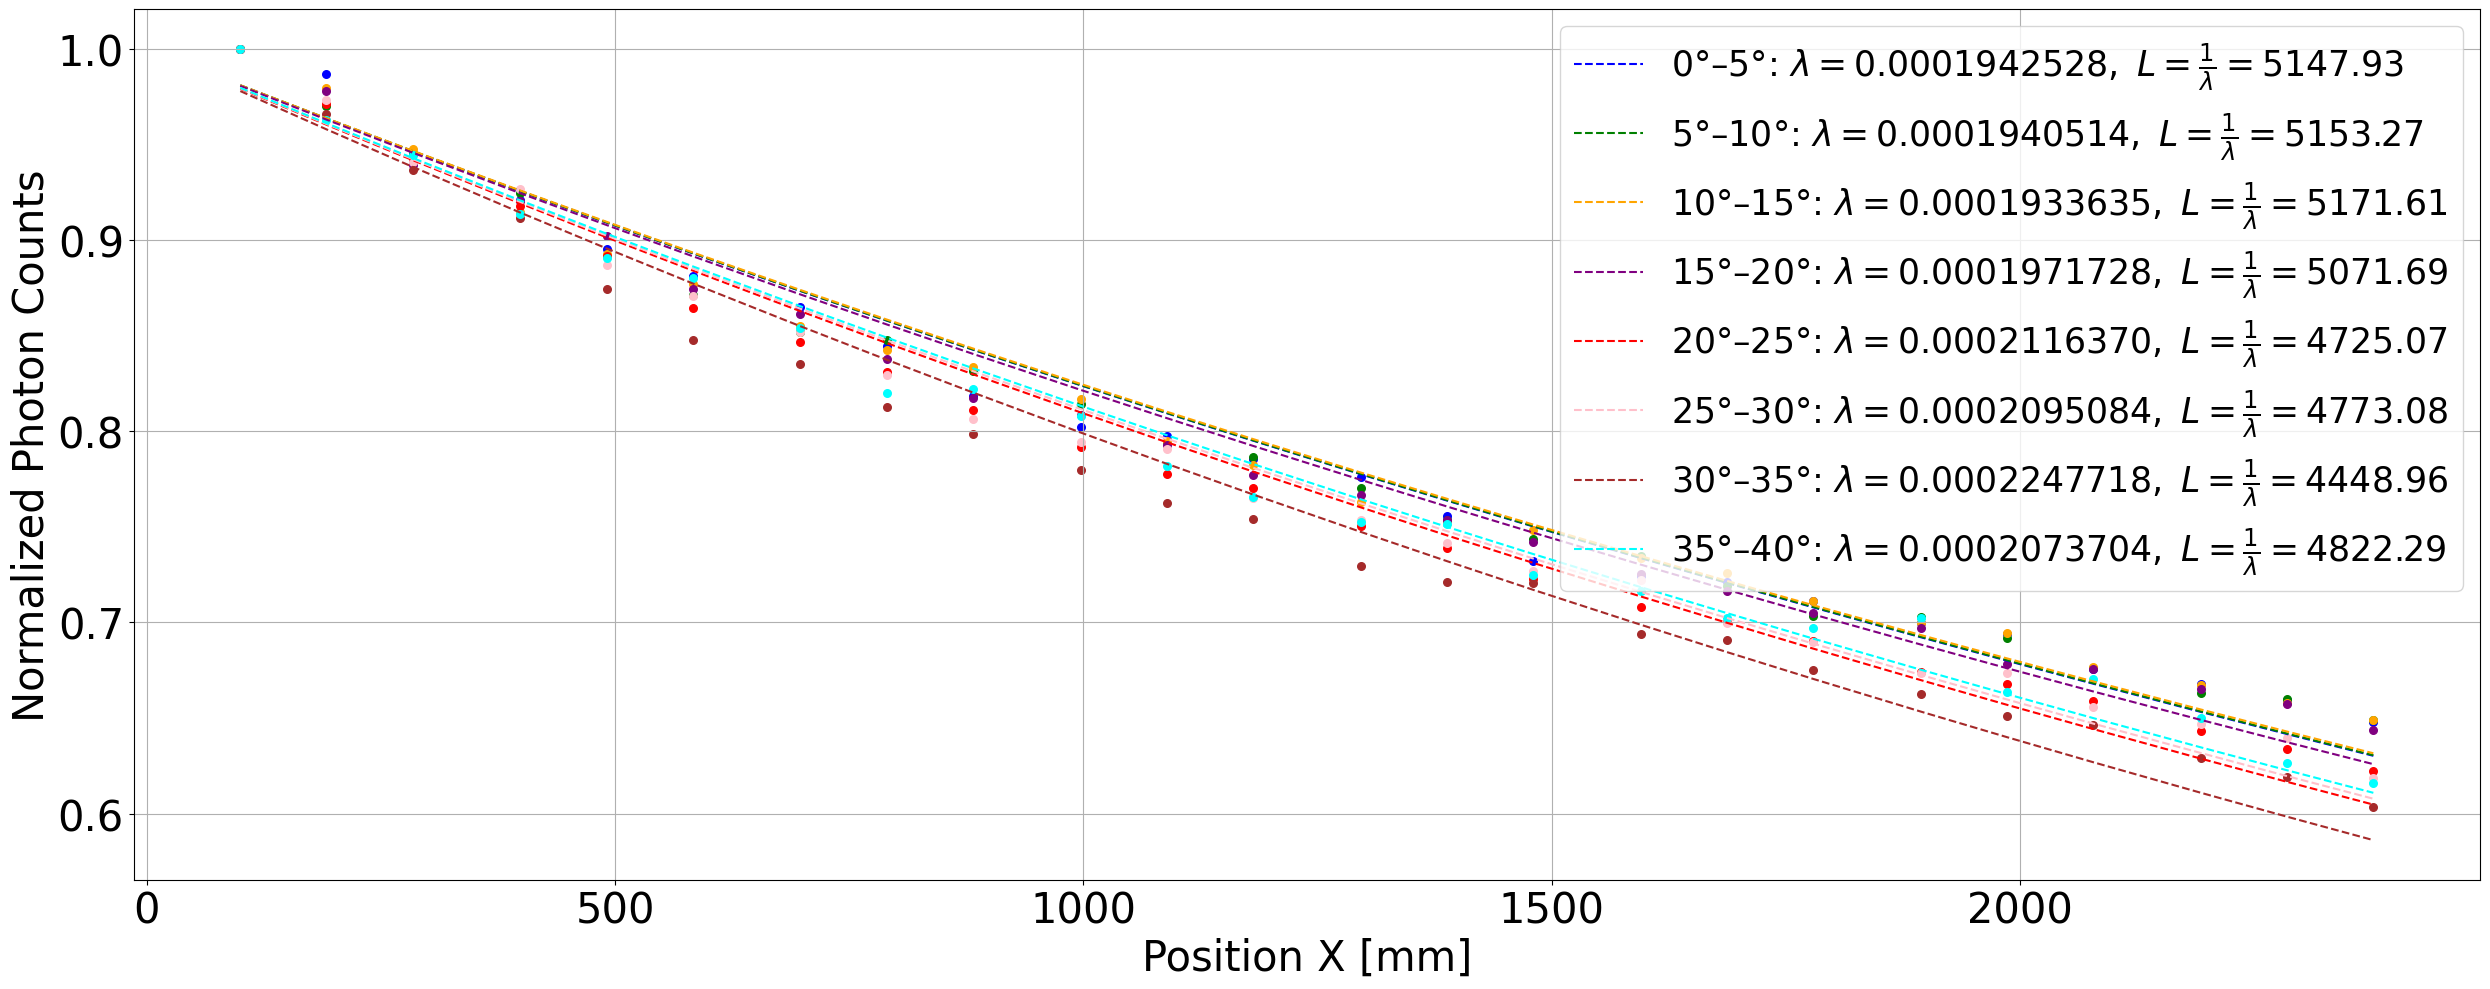

In [51]:
deg_ranges = [
    (0, 5),
    (5, 10),
    (10, 15),
    (15, 20),
    (20, 25),
    (25, 30),
    (30, 35),
    (35, 40)
]
colors = ['blue', 'green', 'orange', 'purple', 'red', 'pink', 'brown', 'cyan']

fit_l = []
# Initialize plot
plt.figure(figsize=(25, 10))

# Loop through each region
for (deg_min, deg_max), color in zip(deg_ranges, colors):
    tmp_clad = cor_core[(cor_core['deg'] > deg_min) & (cor_core['deg'] <= deg_max)]

    counts_clad, bin_edges_clad = np.histogram(tmp_clad['gpsPosX'], bins=100)
    non_zero_mask = counts_clad != 0
    filtered_counts = counts_clad[non_zero_mask]
    filtered_bin_edges = bin_edges_clad[:-1][non_zero_mask]

    if len(filtered_counts) < 2:
        print(f"Skipping region {deg_min}-{deg_max} due to insufficient data.")
        continue

    normalized_counts = filtered_counts / filtered_counts[0]
    x, y = filtered_bin_edges, normalized_counts

    try:
        popt, _ = curve_fit(exp_decay, x, y, p0=(0.001,))
        lambda_fit = popt[0]
        y_fit = exp_decay(x, lambda_fit)

        # LaTeX-style label for the legend
        label = fr'{deg_min}°–{deg_max}°: $\lambda={lambda_fit:.10f},\ L=\frac{{1}}{{\lambda}}={1/lambda_fit:.2f}$'
        fit_l.append(1/lambda_fit)

        # Plot data and fit
        plt.scatter(x, y, s=30, color=color)
        plt.plot(x, y_fit, '--', color=color, label=label)

    except RuntimeError:
        print(f"Fit failed for region {deg_min}-{deg_max}")

# Final plot formatting
plt.xlabel("Position X [mm]", fontsize=30)
plt.ylabel("Normalized Photon Counts", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=30)
#plt.title("Fits for Photon Emission Angle Ranges (20°–40°)")
plt.legend(fontsize=25, markerscale=3)
plt.grid(True)
plt.tight_layout()
plt.savefig("fit_40_core.png", dpi=300)
plt.show()

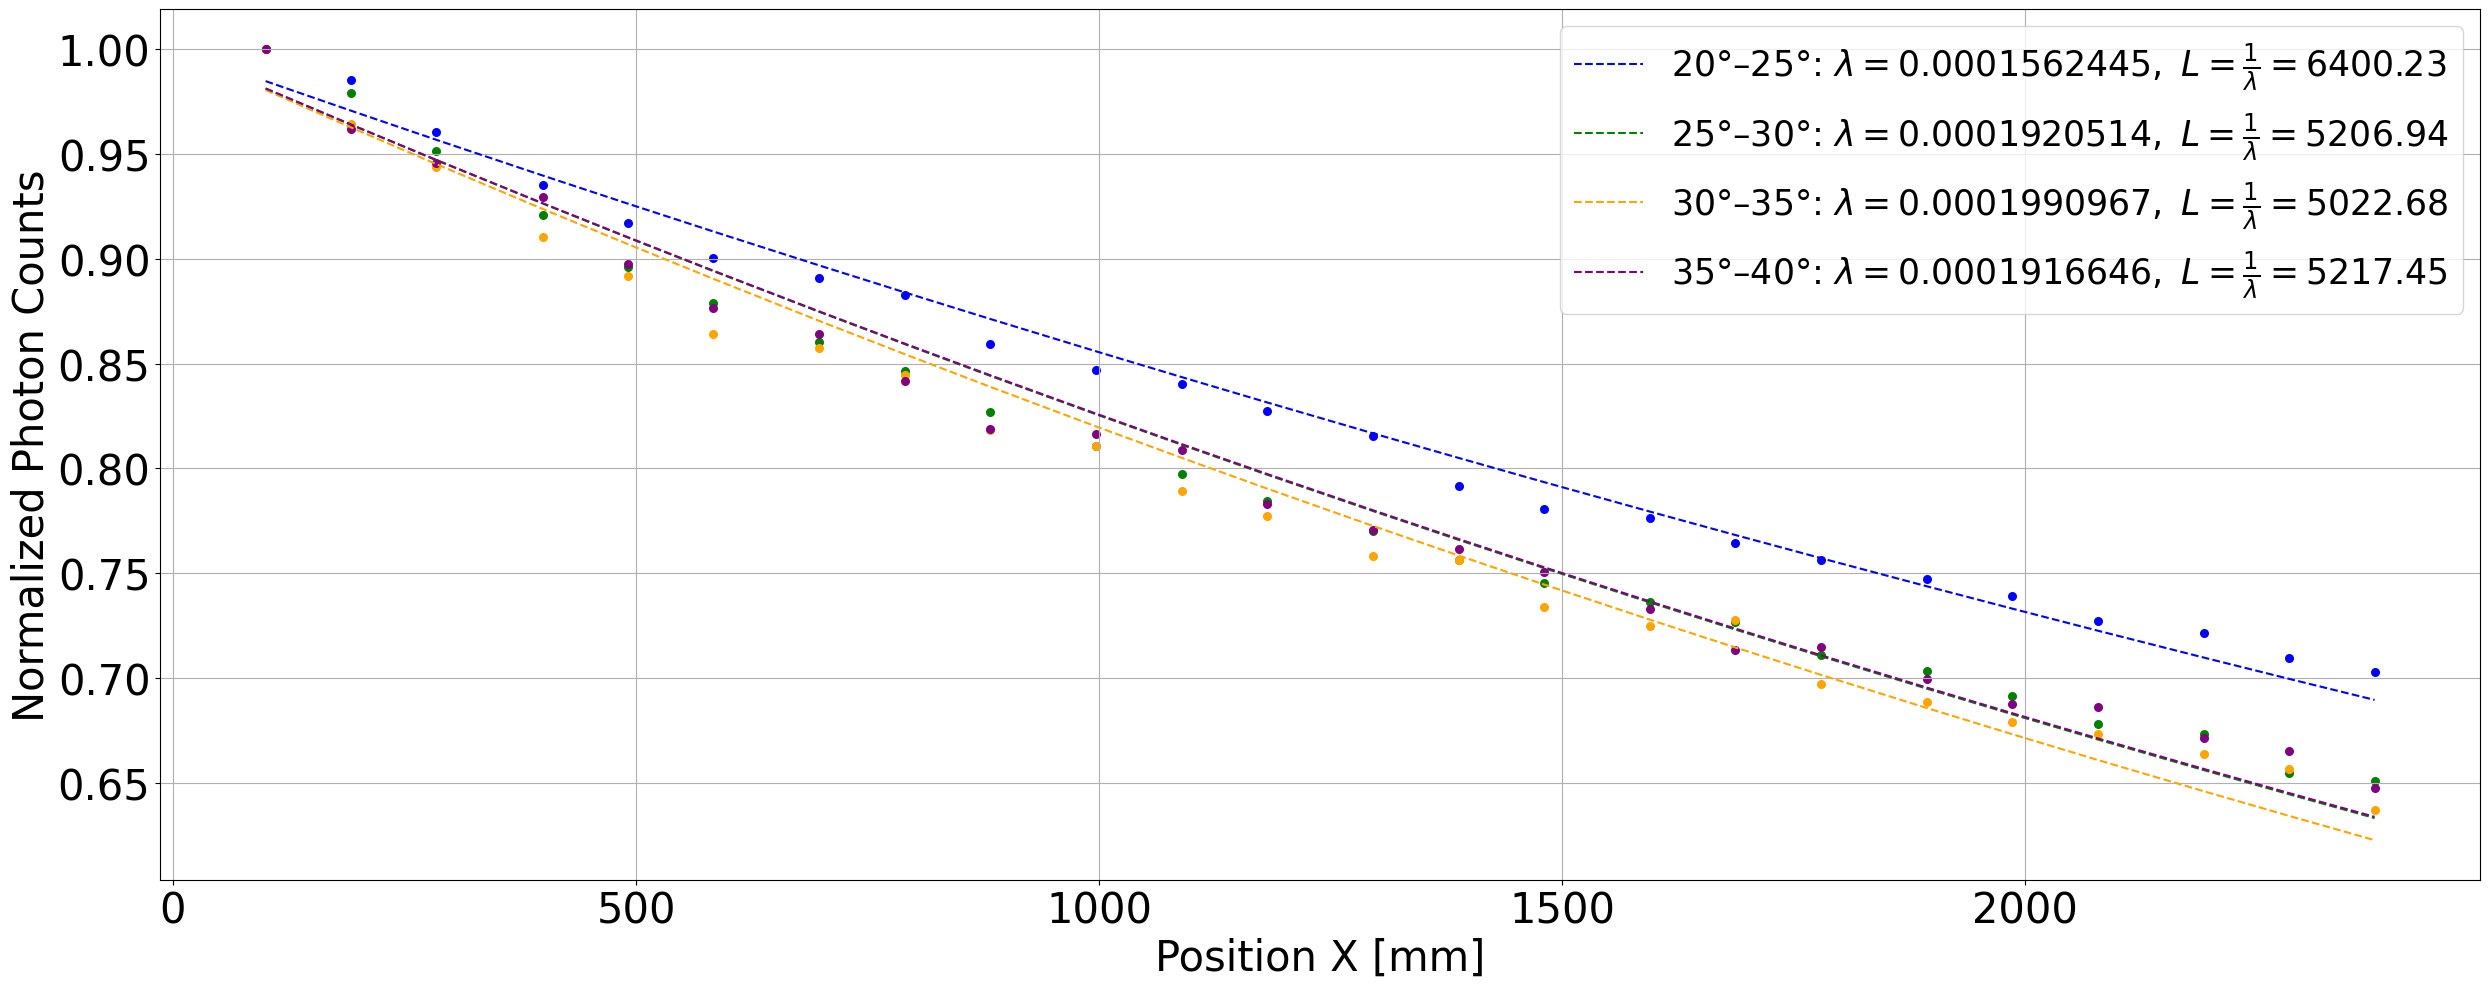

In [52]:
deg_ranges = [
    (20, 25),
    (25, 30),
    (30, 35),
    (35, 40)
]
colors = ['blue', 'green', 'orange', 'purple', 'red', 'pink', 'brown', 'cyan']

fit_l = []
# Initialize plot
plt.figure(figsize=(25, 10))

# Loop through each region
for (deg_min, deg_max), color in zip(deg_ranges, colors):
    tmp_clad = cor_clad[(cor_clad['deg'] > deg_min) & (cor_clad['deg'] <= deg_max)]

    counts_clad, bin_edges_clad = np.histogram(tmp_clad['gpsPosX'], bins=100)
    non_zero_mask = counts_clad != 0
    filtered_counts = counts_clad[non_zero_mask]
    filtered_bin_edges = bin_edges_clad[:-1][non_zero_mask]

    if len(filtered_counts) < 2:
        print(f"Skipping region {deg_min}-{deg_max} due to insufficient data.")
        continue

    normalized_counts = filtered_counts / filtered_counts[0]
    x, y = filtered_bin_edges, normalized_counts

    try:
        popt, _ = curve_fit(exp_decay, x, y, p0=(0.001,))
        lambda_fit = popt[0]
        y_fit = exp_decay(x, lambda_fit)

        # LaTeX-style label for the legend
        label = fr'{deg_min}°–{deg_max}°: $\lambda={lambda_fit:.10f},\ L=\frac{{1}}{{\lambda}}={1/lambda_fit:.2f}$'
        fit_l.append(1/lambda_fit)

        # Plot data and fit
        plt.scatter(x, y, s=30, color=color)
        plt.plot(x, y_fit, '--', color=color, label=label)

    except RuntimeError:
        print(f"Fit failed for region {deg_min}-{deg_max}")

# Final plot formatting
plt.xlabel("Position X [mm]", fontsize=30)
plt.ylabel("Normalized Photon Counts", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=30)
#plt.title("Fits for Photon Emission Angle Ranges (20°–40°)")
plt.legend(fontsize=25, markerscale=3)
plt.grid(True)
plt.tight_layout()
plt.savefig("fit_40_clad.png", dpi=300)
plt.show()

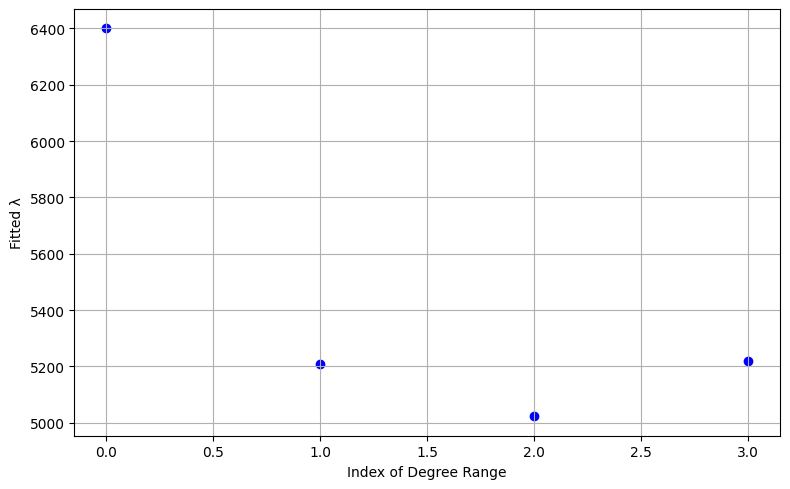

In [53]:
plt.figure(figsize=(8, 5))
plt.scatter(np.arange(len(fit_l)), fit_l, color='blue')
plt.xlabel("Index of Degree Range")
plt.ylabel("Fitted λ")
#plt.title("Fitted λ for Each Degree Range")
plt.grid(True)
plt.tight_layout()
plt.show()

TASK 4

The x-dependent intensity is to be determined for 10 different angles (0° to 40°). To do this, 20 excitation locations should be selected. Use the recorded data to determine the attenuation lengthand compare it with the simulation.


In [54]:
df_combined = pd.DataFrame(columns=['lambda/nm', 'C1', 'h', 'v', 'x'])

In [55]:
for h in range(0,40, 2):
  for x in range(10, 2000, 50):
    file_path = f'{path}Raj_Intensity/Attenuation_h={h}deg_v={0}deg_x={x}mm.txt'
    try:
      df_new = pd.read_csv(file_path, delimiter='\t', header=0)

      df_new.columns = [col.lstrip('#') for col in df_new.columns]
      df_new['h'] = h
      df_new['v'] = 0
      df_new['x'] = x
      df_combined = pd.concat([df_combined, df_new], ignore_index=True)
    except FileNotFoundError:
                print(f"File not found: {file_path}")

/tmp/ipython-input-1728649459.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_combined = pd.concat([df_combined, df_new], ignore_index=True)


In [56]:
df = df_combined

In [57]:
#Position h = 0 only
group = df_combined[ (df['h'] == 38) & (df_combined['lambda/nm'] > 400) & (df_combined['lambda/nm'] < 600) ]
df_integrated_lambda = group.groupby(['h', 'v', 'x'], as_index=False).agg({'C1': 'sum'})

In [58]:
np.shape(df_integrated_lambda['x'])

(38,)

In [59]:
y[:3], y[3:10], y[10:]

(array([1.        , 0.96170372, 0.94545115]),
 array([0.92929199, 0.89753409, 0.87661125, 0.86418831, 0.84149075,
        0.81898001, 0.81627125]),
 array([0.8087988 , 0.78320568, 0.77050252, 0.76153559, 0.75051373,
        0.7331403 , 0.71361853, 0.7148328 , 0.69951429, 0.68774519,
        0.68643751, 0.67167943, 0.66560807, 0.6476742 ]))

In [60]:
diff_one , diff_two = np.mean(y[:3]) - np.mean(y[3:10]), np.mean(y[3:10]) - np.mean(y[10:])
diff_one , diff_two = 0,0

In [61]:
# Normalize C1 column
normalized_counts = df_integrated_lambda['C1'] / df_integrated_lambda['C1'].iloc[0]
x = df_integrated_lambda['x'].astype(float).to_numpy()
y = normalized_counts.astype(float).to_numpy()

y = np.concatenate([y[:3], y[3:13]+diff_one, y[13:]+diff_two])

In [62]:
def exp_decay(x, lamb):
    return np.exp(-lamb * x)

popt, _ = curve_fit(exp_decay, x, y, p0=(0.001,))
lambda_fit = popt[0]

y_fit = exp_decay(x, lambda_fit)


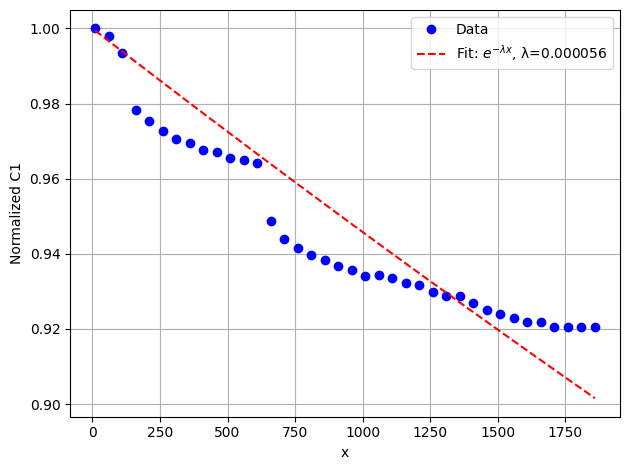

Fitted λ = 0.000056
Fitted attenuation length = 17950.050257


In [63]:
# Plot
plt.plot(x, y, 'bo', label='Data')
plt.plot(x, y_fit, 'r--', label=f'Fit: $e^{{-\\lambda x}}$, λ={lambda_fit:.6f}')
plt.xlabel("x")
plt.ylabel("Normalized C1")
#plt.title("Exponential Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Fitted λ = {lambda_fit:.6f}")
print(f"Fitted attenuation length = {1/lambda_fit:.6f}")

In [64]:
36411.060776/4624.417240

7.873653886819262

In [65]:
# df = df[df['C1'] > 0]

# # Integrate C1 over wavelength for each (h, v, x)
# df_integrated_lambda = df.groupby(['h', 'v', 'x'], as_index=False).agg({'C1': 'sum'})
# df_integrated_lambda['log_C1'] = np.log(df_integrated_lambda['C1'])

# # Group by angle pairs
# grouped = df_integrated_lambda.groupby(['h', 'v'])

# # Plot all (h, v) in one graph
# plt.figure(figsize=(10, 6))

# for (h, v), group in grouped:
#     group_sorted = group.sort_values('x')
#     label = f'h={h}°'
#     plt.scatter(group_sorted['x'], group_sorted['log_C1'], marker='o', label=label)

# #plt.title('ln(Integrated Intensity over λ) vs x for All (h, v) Pairs')
# plt.xlabel('x (mm)')
# plt.ylabel('ln(Total Intensity over λ)')
# plt.grid(True)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
# plt.tight_layout()
# plt.show()

In [66]:
(df_combined['lambda/nm'] > 400) & (df_combined['lambda/nm'] < 600)

,lambda/nm
0,False
1,False
2,False
3,False
4,False
...,...
1634299,False
1634300,False
1634301,False
1634302,False


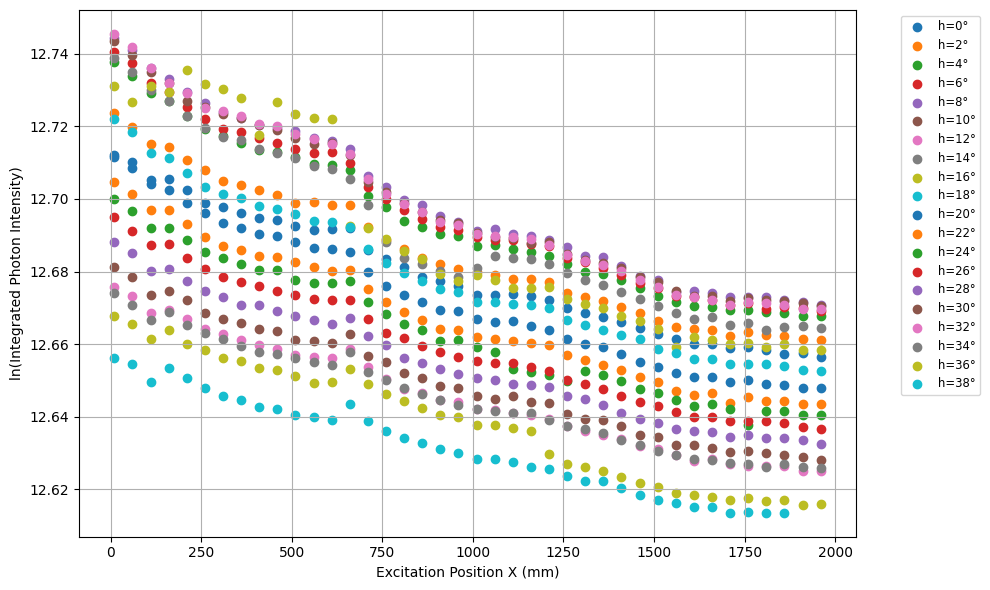

In [67]:
df = df_combined[(df_combined['C1'] > 0) & (df_combined['lambda/nm'] > 400) & (df_combined['lambda/nm'] < 600)]

df_integrated_lambda = df.groupby(['h', 'v', 'x'], as_index=False).agg({'C1': 'sum'})
df_integrated_lambda['log_C1'] = np.log(df_integrated_lambda['C1'])

# First pass: detect jumps
first_jumps = []
second_jumps = []

grouped = df_integrated_lambda.groupby(['h', 'v'])

for (h, v), group in grouped:
    group_sorted = group.sort_values('x')
    log_C1_vals = group_sorted['log_C1'].values
    diff = np.diff(log_C1_vals)
    threshold = np.std(diff) * 2

    jump_indices = [i for i in range(1, len(diff)) if abs(diff[i - 1]) > threshold]
    if len(jump_indices) >= 1:
        i = jump_indices[0]
        first_jumps.append(log_C1_vals[i] - log_C1_vals[i - 1])
    if len(jump_indices) >= 2:
        i = jump_indices[1]
        second_jumps.append(log_C1_vals[i] - log_C1_vals[i - 1])

# Fixed jump values (median)
fixed_jump_1 = np.median(first_jumps) if first_jumps else 0
fixed_jump_2 = np.median(second_jumps) if second_jumps else 0

# Second pass: apply both jump corrections
plt.figure(figsize=(10, 6))
for (h, v), group in grouped:
    group_sorted = group.sort_values('x')
    x_vals = group_sorted['x'].values
    log_C1_vals = group_sorted['log_C1'].values.copy()
    diff = np.diff(log_C1_vals)
    threshold = np.std(diff) * 2

    jump_indices = [i for i in range(1, len(diff)) if abs(diff[i - 1]) > threshold]

    if len(jump_indices) >= 1:
        idx1 = jump_indices[0]
        log_C1_vals[idx1:] -= fixed_jump_1
        # plt.axvline(x=x_vals[idx1], color='red', linestyle='--', lw=1)
    if len(jump_indices) >= 2:
        idx2 = jump_indices[1]
        log_C1_vals[idx2:] -= fixed_jump_2
        # plt.axvline(x=x_vals[idx2], color='blue', linestyle='--', lw=1)

    plt.scatter(x_vals, log_C1_vals, marker='o', label=f'h={h}°')

# #plt.title('ln(Integrated Intensity over λ) vs x with Two-Step Jump Alignment')
# plt.xlabel('x (mm)')
# plt.ylabel('ln(Total Intensity over λ)')
# plt.grid(True)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
# plt.tight_layout()
# plt.show()


#plt.title('ln(Integrated Photon Intensity) vs Excitation Position X with Two-Step Jump Alignment')
plt.xlabel('Excitation Position X (mm)')
plt.ylabel('ln(Integrated Photon Intensity)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

In [68]:
fixed_jump_1, fixed_jump_2

(np.float64(-0.019243670342635966), np.float64(-0.020804889536276683))

In [69]:
# df = df[df['C1'] > 0]

# # Integrate C1 over wavelength for each (h, v, x)
# df_integrated_lambda = df.groupby(['h', 'v', 'x'], as_index=False).agg({'C1': 'sum'})
# df_integrated_lambda['log_C1'] = np.log(df_integrated_lambda['C1'])

# # Group by angle pairs
# grouped = df_integrated_lambda.groupby(['h', 'v'])

# plt.figure(figsize=(10, 6))

# for (h, v), group in grouped:
#     group_sorted = group.sort_values('x')
#     x_vals = group_sorted['x'].values
#     log_C1_vals = group_sorted['log_C1'].values

#     # Calculate the difference between successive points
#     diff = np.diff(log_C1_vals)
#     significant_jump_threshold = np.std(diff) * 2

#     plt.scatter(x_vals, log_C1_vals, marker='o', label=f'h={h}°')

#     for i in range(1, len(diff)):
#         if abs(diff[i-1]) > significant_jump_threshold:
#             # Print the x-value where the jump occurs
#             # print(f"Significant jump detected at x = {x_vals[i]} mm")


#             plt.plot([x_vals[i-1], x_vals[i]], [log_C1_vals[i-1], log_C1_vals[i]], 'r-', lw=2)
#             # plt.axvline(x=x_vals[i], color='red', linestyle='--', lw=1)

# #plt.title('ln(Integrated Photon Intensity) vs Excitation Position X for Horizontal Angle')
# plt.xlabel('Excitation Position X (mm)')
# plt.ylabel('ln(Integrated Photon Intensity)')
# plt.grid(True)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
# plt.tight_layout()
# plt.show()

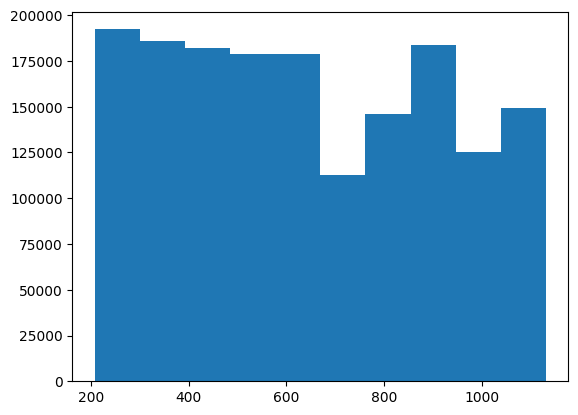

In [70]:
plt.hist(df_combined['lambda/nm'])
plt.show()

In [71]:
df_combined_copy = df_combined.copy()
df_combined_copy = df_combined_copy[ (df_combined['lambda/nm'] == 468.3) ]

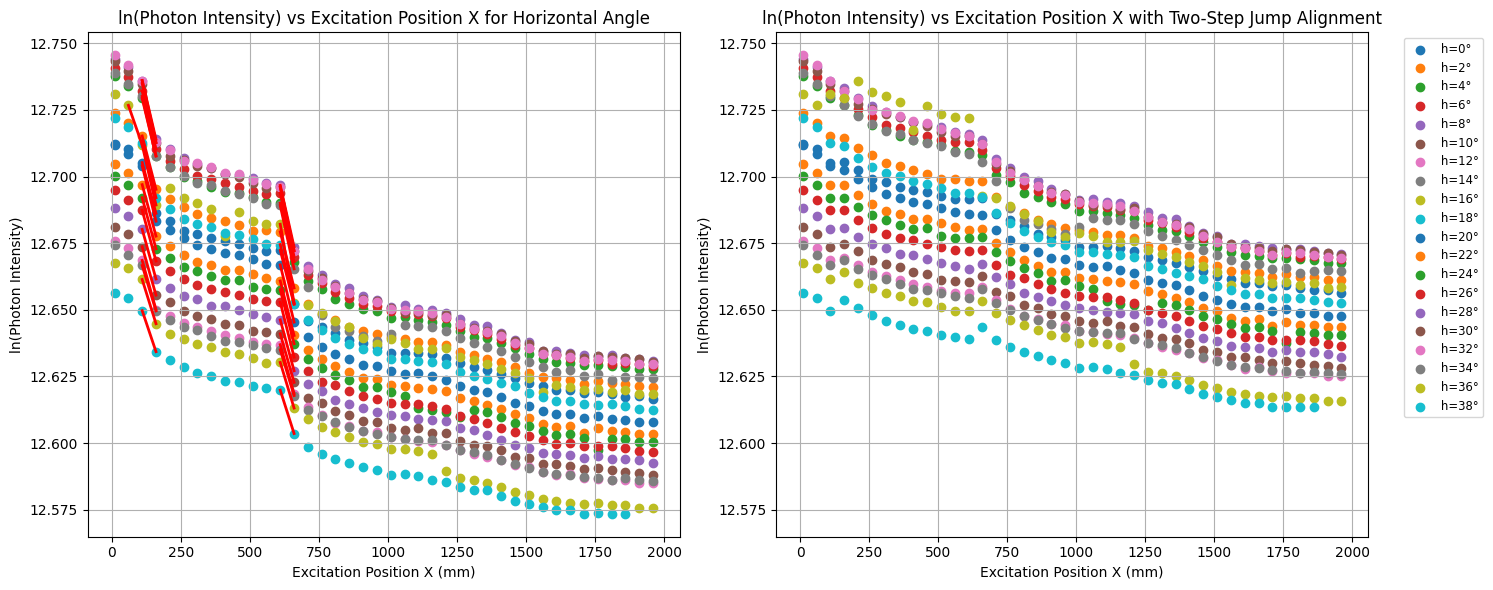

In [72]:
df = df_combined[(df_combined['C1'] > 0) & (df_combined['lambda/nm'] > 400) & (df_combined['lambda/nm'] < 600)]
# df = df_combined_copy[df_combined_copy['C1'] > 0]

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# First plot (Significant jump detection)
df = df[df['C1'] > 0]

df_integrated_lambda = df.groupby(['h', 'v', 'x'], as_index=False).agg({'C1': 'sum'})
df_integrated_lambda['log_C1'] = np.log(df_integrated_lambda['C1'])

grouped = df_integrated_lambda.groupby(['h', 'v'])

for (h, v), group in grouped:
    group_sorted = group.sort_values('x')
    x_vals = group_sorted['x'].values
    log_C1_vals = group_sorted['log_C1'].values

    # Calculate the difference between successive points
    diff = np.diff(log_C1_vals)
    significant_jump_threshold = np.std(diff) * 2

    axes[0].scatter(x_vals, log_C1_vals, marker='o', label=f'h={h}°')

    for i in range(1, len(diff)):
        if abs(diff[i-1]) > significant_jump_threshold:
            axes[0].plot([x_vals[i-1], x_vals[i]], [log_C1_vals[i-1], log_C1_vals[i]], 'r-', lw=2)

axes[0].set_title('ln(Photon Intensity) vs Excitation Position X for Horizontal Angle')
axes[0].set_xlabel('Excitation Position X (mm)')
axes[0].set_ylabel('ln(Photon Intensity)')
axes[0].grid(True)
# axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# Second plot (Two-step jump correction)
# df = df_combined[df_combined['C1'] > 0]
df = df_combined[(df_combined['C1'] > 0) & (df_combined['lambda/nm'] > 400) & (df_combined['lambda/nm'] < 600)]

df_integrated_lambda = df.groupby(['h', 'v', 'x'], as_index=False).agg({'C1': 'sum'})
df_integrated_lambda['log_C1'] = np.log(df_integrated_lambda['C1'])

# First pass: detect jumps
first_jumps = []
second_jumps = []
grouped = df_integrated_lambda.groupby(['h', 'v'])

for (h, v), group in grouped:
    group_sorted = group.sort_values('x')
    log_C1_vals = group_sorted['log_C1'].values
    diff = np.diff(log_C1_vals)
    threshold = np.std(diff) * 2

    jump_indices = [i for i in range(1, len(diff)) if abs(diff[i - 1]) > threshold]
    if len(jump_indices) >= 1:
        i = jump_indices[0]
        first_jumps.append(log_C1_vals[i] - log_C1_vals[i - 1])
    if len(jump_indices) >= 2:
        i = jump_indices[1]
        second_jumps.append(log_C1_vals[i] - log_C1_vals[i - 1])

# Fixed jump values (median)
fixed_jump_1 = np.median(first_jumps) if first_jumps else 0
fixed_jump_2 = np.median(second_jumps) if second_jumps else 0

# Second pass: apply both jump corrections
for (h, v), group in grouped:
    group_sorted = group.sort_values('x')
    x_vals = group_sorted['x'].values
    log_C1_vals = group_sorted['log_C1'].values.copy()
    diff = np.diff(log_C1_vals)
    threshold = np.std(diff) * 2

    jump_indices = [i for i in range(1, len(diff)) if abs(diff[i - 1]) > threshold]

    if len(jump_indices) >= 1:
        idx1 = jump_indices[0]
        log_C1_vals[idx1:] -= fixed_jump_1
    if len(jump_indices) >= 2:
        idx2 = jump_indices[1]
        log_C1_vals[idx2:] -= fixed_jump_2

    axes[1].scatter(x_vals, log_C1_vals, marker='o', label=f'h={h}°')

axes[1].set_title('ln(Photon Intensity) vs Excitation Position X with Two-Step Jump Alignment')
axes[1].set_xlabel('Excitation Position X (mm)')
axes[1].set_ylabel('ln(Photon Intensity)')
axes[1].grid(True)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# Set same y-axis limits for both plots
ymin = min(axes[0].get_ylim()[0], axes[1].get_ylim()[0])
ymax = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
for ax in axes:
    ax.set_ylim(ymin, ymax)

# Adjust layout
plt.tight_layout()
plt.savefig("jump.png", dpi=300)
# Show the plot
plt.show()


(np.float64(-0.00028531051692581855), np.float64(127.07177439829026), np.int64(0))
(np.float64(-0.0003164247337543724), np.float64(127.16034548027149), np.int64(2))
(np.float64(-0.0003563762474434462), np.float64(127.2897813202352), np.int64(4))
(np.float64(-0.0003637520675598971), np.float64(127.31942821353704), np.int64(6))
(np.float64(-0.0003776748262436236), np.float64(127.36187791988058), np.int64(8))
(np.float64(-0.00037416257137889986), np.float64(127.34879306615275), np.int64(10))
(np.float64(-0.000388172860524838), np.float64(127.36233180674793), np.int64(12))
(np.float64(-0.00037731018022002516), np.float64(127.28049253632568), np.int64(14))
(np.float64(-0.00045537810531759426), np.float64(127.34575126908871), np.int64(16))
(np.float64(-0.0003493352530392624), np.float64(127.13127084736756), np.int64(18))
(np.float64(-0.0003260494265209246), np.float64(127.04502484083162), np.int64(20))
(np.float64(-0.0003151562554386188), np.float64(126.98234839177636), np.int64(22))
(np.flo

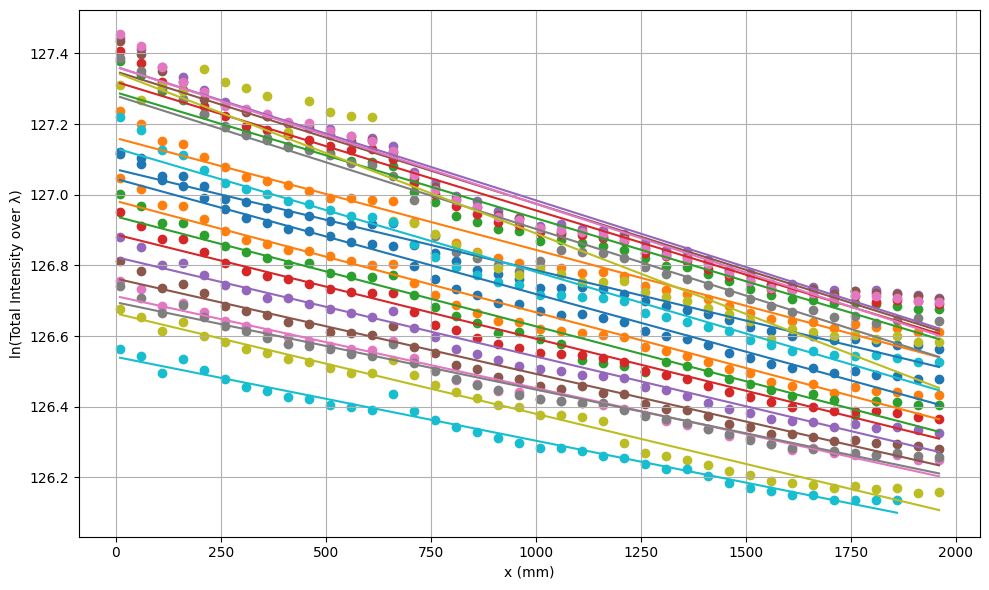

In [73]:
# Assuming the DataFrame 'df_combined' is already defined
# df = df_combined[df_combined['C1'] > 0]

df = df_combined[(df_combined['C1'] > 0) & (df_combined['lambda/nm'] > 400) & (df_combined['lambda/nm'] < 600)]

# Grouping the data and calculating log(C1)
df_integrated_lambda = df.groupby(['h', 'v', 'x'], as_index=False).agg({'C1': 'sum'})
df_integrated_lambda['log_C1'] = np.log(df_integrated_lambda['C1'])*10


coff_a = []
coff_b = []
coff_h = []
# First pass: detect jumps
first_jumps = []
second_jumps = []

grouped = df_integrated_lambda.groupby(['h', 'v'])

# Function to fit (for example, a linear model)
def linear_model(x, a, b):
    return a * x + b

# Loop through each group of data
for (h, v), group in grouped:
    group_sorted = group.sort_values('x')
    log_C1_vals = group_sorted['log_C1'].values
    diff = np.diff(log_C1_vals)
    threshold = np.std(diff) * 2

    jump_indices = [i for i in range(1, len(diff)) if abs(diff[i - 1]) > threshold]
    if len(jump_indices) >= 1:
        i = jump_indices[0]
        first_jumps.append(log_C1_vals[i] - log_C1_vals[i - 1])
    if len(jump_indices) >= 2:
        i = jump_indices[1]
        second_jumps.append(log_C1_vals[i] - log_C1_vals[i - 1])

# Fixed jump values (median)
fixed_jump_1 = np.median(first_jumps) if first_jumps else 0
fixed_jump_2 = np.median(second_jumps) if second_jumps else 0

# Second pass: apply both jump corrections
plt.figure(figsize=(10, 6))
for (h, v), group in grouped:
    group_sorted = group.sort_values('x')
    x_vals = group_sorted['x'].values
    log_C1_vals = group_sorted['log_C1'].values.copy()
    diff = np.diff(log_C1_vals)
    threshold = np.std(diff) * 2

    jump_indices = [i for i in range(1, len(diff)) if abs(diff[i - 1]) > threshold]

    if len(jump_indices) >= 1:
        idx1 = jump_indices[0]
        log_C1_vals[idx1:] -= fixed_jump_1
        # plt.axvline(x=x_vals[idx1], color='red', linestyle='--', lw=1)
    if len(jump_indices) >= 2:
        idx2 = jump_indices[1]
        log_C1_vals[idx2:] -= fixed_jump_2
        # plt.axvline(x=x_vals[idx2], color='blue', linestyle='--', lw=1)

    # Fit the model to the data
    popt, _ = curve_fit(linear_model, x_vals, log_C1_vals)

    # Extract the fitted coefficients
    a, b = popt  # These are the coefficients for the linear model

    # Plot the fitted line
    plt.plot(x_vals, linear_model(x_vals, *popt), label=f'Fit h={h}°')

    # Plot the original data as scatter
    plt.scatter(x_vals, log_C1_vals, marker='o', label=f'h={h}°')

    coff_a.append(a)
    coff_b.append(b)
    coff_h.append(h)
    print(f'{a, b, h}')

# Add title and labels
#plt.title('ln(Integrated Intensity over λ) vs x with Two-Step Jump Alignment and Curve Fitting')
plt.xlabel('x (mm)')
plt.ylabel('ln(Total Intensity over λ)')
plt.grid(True)

# Add legend to the plot
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

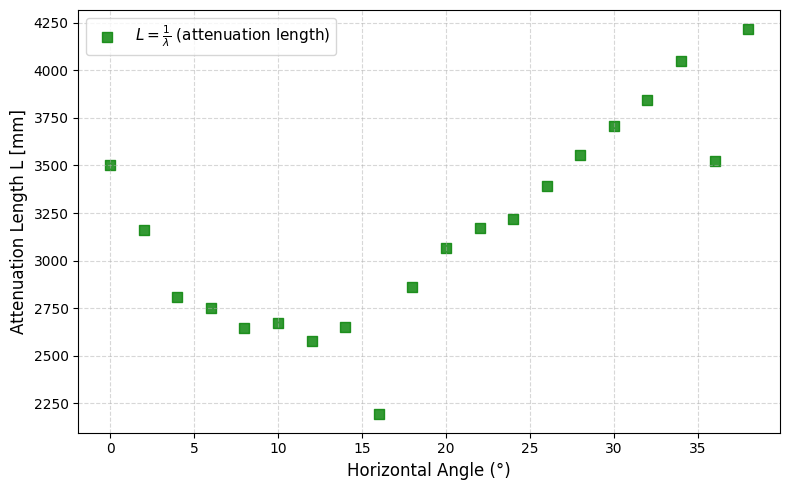

In [74]:
L = -1/np.array(coff_a)
plt.figure(figsize=(8, 5))
plt.scatter(coff_h, L, color='green', s=60, marker='s', label=r'$L = \frac{1}{\lambda}$ (attenuation length)', alpha=0.8)


# Labeling and formatting
plt.xlabel("Horizontal Angle (°)", fontsize=12)
plt.ylabel("Attenuation Length L [mm]", fontsize=12)
#plt.title("Fitted Attenuation Length L vs Horizontal Angle (°)", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("l-fit.png", dpi=300)
plt.show()


In [75]:
L

array([3504.95316743, 3160.30920888, 2806.02314878, 2749.12526741,
       2647.78039338, 2672.63504288, 2576.17185974, 2650.33930284,
       2195.9773391 , 2862.57968899, 3067.0196561 , 3173.02919661,
       3217.46108748, 3393.77520401, 3553.59379979, 3708.95251419,
       3844.18745356, 4046.94612383, 3523.39750747, 4216.26349029])

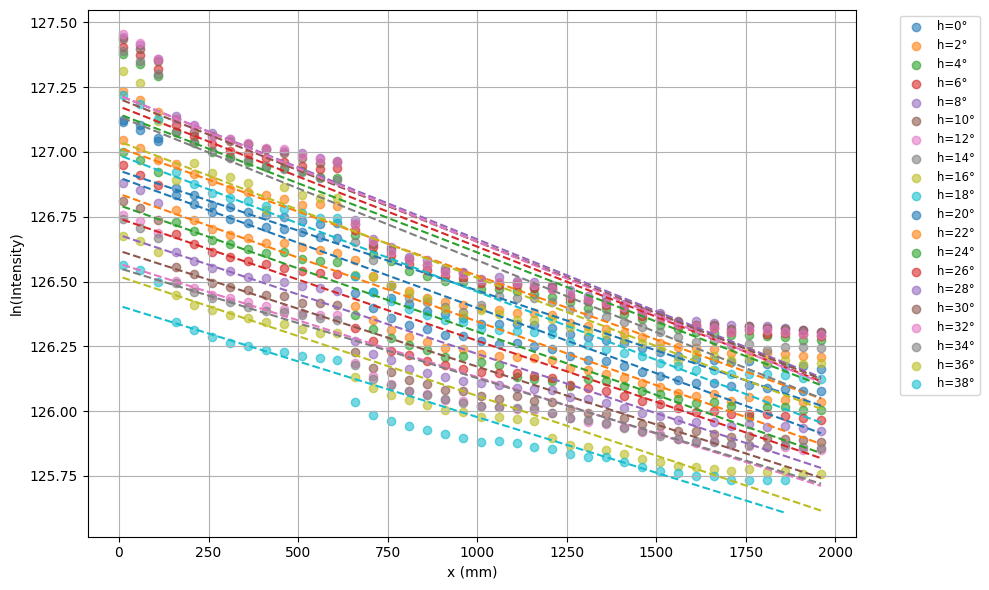

In [76]:
from sklearn.linear_model import LinearRegression
plt.figure(figsize=(10, 6))

# Dictionary to store attenuation lengths
attenuation_lengths = {}
lambda_att = []

# Loop over each (h, v) group
for (h, v), group in grouped:
    group_sorted = group.sort_values('x')
    group_x = np.array(group_sorted['x']).reshape(-1, 1)
    group_log_C1 = np.array(group_sorted['log_C1'])

    # Fit linear regression model
    model = LinearRegression()
    model.fit(group_x, group_log_C1)

    slope = model.coef_[0]
    intercept = model.intercept_
    # Store the slope in the list

    if slope != 0:
        lambda_att_tmp = -1 / slope
        lambda_att.append(lambda_att_tmp)
        attenuation_lengths[(h, v)] = lambda_att

        # Plot data points
        plt.scatter(group_x, group_log_C1, label=f'h={h}°', alpha=0.6)

        # Plot regression line
        x_fit = np.linspace(group_x.min(), group_x.max(), 100).reshape(-1, 1)
        y_fit = model.predict(x_fit)
        plt.plot(x_fit, y_fit, linestyle='--')

# Plot settings
#plt.title('Log(Intensity) vs x with Linear Regression Lines')
plt.xlabel('x (mm)')
plt.ylabel('ln(Intensity)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


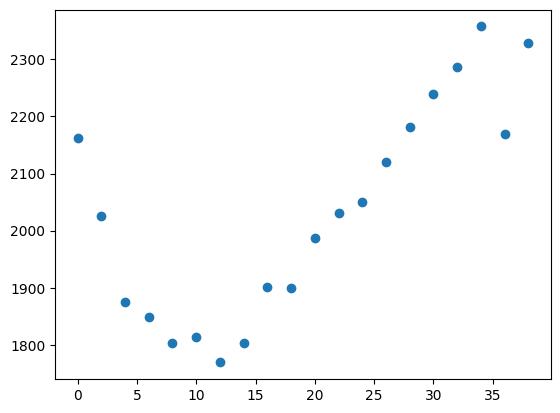

In [77]:
plt.scatter(coff_h, lambda_att)